<a href="https://colab.research.google.com/github/JUNGSEAHYUN04/2023-OSS/blob/main/Untitled25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 공공데이터 대기

In [1]:
!pip install koreanize_matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.1 MB/s eta 0:00:00


In [4]:
file_path_air_quality = '대기오염(구별)_20240601105523.csv'
df_air_quality = pd.read_csv(file_path_air_quality)

df_air_quality

구분별(1)              2015           2015.1            2015.2  \
0    구분별(1)  아황산가스(SO2) (ppm)  일산화탄소(CO) (ppm)  이산화질소(NO2) (ppm)   
1       강남구             0.005              0.5             0.035   
2       강동구             0.005              0.5             0.031   
3       강북구             0.005              0.4             0.030   
4       강서구             0.006              0.4             0.030   
5       관악구             0.005              0.7             0.036   
6       광진구             0.005              0.5             0.031   
7       구로구             0.006              0.6             0.028   
8    국가환경기준         0.02ppm/년         9ppm/8시간         0.03ppm/년   
9       금천구             0.006              0.6             0.033   
10      노원구             0.006              0.5             0.030   
11      도봉구             0.005              0.5             0.030   
12     동대문구             0.006              0.5             0.035   
13      동작구             0.006              0.5             0.034   
14      마포구             0.005              0.5             0.031   
15     서대문구             0.005              0.5             0.034   
16  서울시환경기준         0.01ppm/년         9ppm/8시간         0.03ppm/년   
17      서초구             0.005              0.5             0.030   
18      성동구             0.004              0.5             0.033   
19      성북구             0.006              0.6             0.032   
20      송파구             0.005              0.6             0.029   
21      양천구             0.006              0.5             0.036   
22     영등포구             0.006              0.6             0.029   
23      용산구             0.005              0.4             0.033   
24      은평구             0.005              0.5             0.032   
25      종로구             0.006              0.4             0.033   
26       중구             0.005              0.6             0.036   
27      중랑구             0.006              0.5             0.034   
28      평 균             0.005              0.5             0.032   

               2015.3               2015.4        2015.5              2016  \
0   미세먼지(PM-10) (㎍/㎥)  초미세먼지(PM-2.5) (㎍/㎥)  오존(O3) (ppm)  아황산가스(SO2) (ppm)   
1                  46                   23         0.021             0.005   
2                  44                   22         0.021             0.004   
3                  45                   22         0.021             0.004   
4                  48                   25         0.023             0.006   
5                  51                   26         0.022             0.006   
6                  45                   22         0.021             0.004   
7                  46                   23         0.025             0.006   
8             50㎍/㎥/년              25㎍/㎥/년   0.06ppm/8시간         0.02ppm/년   
9                  47                   27         0.019             0.004   
10                 46                   20         0.022             0.006   
11                 43                   22         0.025             0.005   
12                 44                   23         0.023             0.006   
13                 44                   24         0.025             0.004   
14                 46                   26         0.025             0.005   
15                 42                   21         0.024             0.004   
16            50㎍/㎥/년              25㎍/㎥/년   0.06ppm/8시간         0.01ppm/년   
17                 47                   23         0.021             0.005   
18                 46                   23         0.021             0.005   
19                 42                   21         0.022             0.005   
20                 44                   22         0.023             0.005   
21                 47                   23         0.022             0.004   
22                 48                   24         0.022             0.004   
23                 42                   24         0.021             0.005   
24            

In [ ]:
df_air_quality.info()

In [ ]:
df_air_quality.describe()

In [ ]:
df_air_quality.head()

In [2]:
def rename_columns(df, year):
    return df.rename(columns={
        f'{year}': f'{year}_SO2',
        f'{year}.1': f'{year}_CO',
        f'{year}.2': f'{year}_NO2',
        f'{year}.3': f'{year}_PM10',
        f'{year}.4': f'{year}_PM2_5',
        f'{year}.5': f'{year}_O3'
    })


In [5]:
df_air_quality.rename(columns={'구분별(1)': '구분별'}, inplace=True)

# 열명을 변경할 연도 리스트
years = [2017, 2018, 2019, 2020, 2021]
df_division = df_air_quality['구분별']
# 각 연도별로 열명 변경 적용
for year in years:
    df_air_quality = rename_columns(df_air_quality, year)


# 데이터프레임을 2017년부터 2021년까지의 데이터로 제한
df_air_quality = df_air_quality[['구분별'] + [col for col in df_air_quality.columns if any(str(year) in col for year in years)]]
df_air_quality

구분별          2017_SO2          2017_CO          2017_NO2  \
0    구분별(1)  아황산가스(SO2) (ppm)  일산화탄소(CO) (ppm)  이산화질소(NO2) (ppm)   
1       강남구             0.005              0.4             0.030   
2       강동구             0.004              0.5             0.031   
3       강북구             0.004              0.5             0.024   
4       강서구             0.007              0.5             0.032   
5       관악구             0.006              0.5             0.032   
6       광진구             0.004              0.6             0.031   
7       구로구             0.006              0.5             0.023   
8    국가환경기준         0.02ppm/년         9ppm/8시간         0.03ppm/년   
9       금천구             0.004              0.5             0.032   
10      노원구             0.004              0.5             0.030   
11      도봉구             0.005              0.5             0.026   
12     동대문구             0.005              0.5             0.030   
13      동작구             0.004              0.5             0.031   
14      마포구             0.004              0.5             0.030   
15     서대문구             0.005              0.5             0.027   
16  서울시환경기준         0.01ppm/년         9ppm/8시간         0.03ppm/년   
17      서초구             0.005              0.5             0.028   
18      성동구             0.004              0.5             0.029   
19      성북구             0.004              0.6             0.033   
20      송파구             0.005              0.6             0.029   
21      양천구             0.005              0.5             0.031   
22     영등포구             0.005              0.7             0.030   
23      용산구             0.004              0.4             0.029   
24      은평구             0.004              0.6             0.026   
25      종로구             0.004              0.6             0.034   
26       중구             0.004              0.5             0.035   
27      중랑구             0.006              0.4             0.029   
28      평 균             0.005              0.5             0.030   

            2017_PM10           2017_PM2_5       2017_O3          2018_SO2  \
0   미세먼지(PM-10) (㎍/㎥)  초미세먼지(PM-2.5) (㎍/㎥)  오존(O3) (ppm)  아황산가스(SO2) (ppm)   
1                  44                   25         0.020             0.005   
2                  48                   24         0.023             0.004   
3                  37                   22         0.031             0.003   
4                  47                   24         0.028             0.004   
5                  43                   26         0.025             0.004   
6                  42                   25         0.028             0.005   
7                  45                   25         0.023             0.005   
8             50㎍/㎥/년              25㎍/㎥/년   0.06ppm/8시간         0.02ppm/년   
9                  41                   26         0.026             0.004   
10                 42                   25         0.028             0.005   
11                 44                   24         0.027             0.005   
12                 44                   22         0.022             0.007   
13                 42                   25         0.027             0.004   
14                 41                   28         0.026             0.004   
15                 46                   24         0.026             0.004   
16            50㎍/㎥/년              25㎍/㎥/년   0.06ppm/8시간         0.01ppm/년   
17                 47                   24         0.025             0.004   
18                 46                   25         0.021             0.005   
19                 48                   25         0.023             0.004   
20                 45                   23         0.025             0.004   
21                 44                   28         0.022             0.004   
22                 49                   24         0.026             0.005   
23                 39                   25         0.020             0.003   
24               

In [30]:
df_air_quality = df_air_quality[df_air_quality['구분별'].str.endswith('구')]
df_air_quality = df_air_quality.sort_values(by='구분별').reset_index(drop=True)

df_air_quality

구분별 2017_SO2 2017_CO 2017_NO2 2017_PM10 2017_PM2_5 2017_O3 2018_SO2  \
0    강남구    0.005     0.4    0.030        44         25   0.020    0.005   
1    강동구    0.004     0.5    0.031        48         24   0.023    0.004   
2    강북구    0.004     0.5    0.024        37         22   0.031    0.003   
3    강서구    0.007     0.5    0.032        47         24   0.028    0.004   
4    관악구    0.006     0.5    0.032        43         26   0.025    0.004   
5    광진구    0.004     0.6    0.031        42         25   0.028    0.005   
6    구로구    0.006     0.5    0.023        45         25   0.023    0.005   
7    금천구    0.004     0.5    0.032        41         26   0.026    0.004   
8    노원구    0.004     0.5    0.030        42         25   0.028    0.005   
9    도봉구    0.005     0.5    0.026        44         24   0.027    0.005   
10  동대문구    0.005     0.5    0.030        44         22   0.022    0.007   
11   동작구    0.004     0.5    0.031        42         25   0.027    0.004   
12   마포구    0.004     0.5    0.030        41         28   0.026    0.004   
13  서대문구    0.005     0.5    0.027        46         24   0.026    0.004   
14   서초구    0.005     0.5    0.028        47         24   0.025    0.004   
15   성동구    0.004     0.5    0.029        46         25   0.021    0.005   
16   성북구    0.004     0.6    0.033        48         25   0.023    0.004   
17   송파구    0.005     0.6    0.029        45         23   0.025    0.004   
18   양천구    0.005     0.5    0.031        44         28   0.022    0.004   
19  영등포구    0.005     0.7    0.030        49         24   0.026    0.005   
20   용산구    0.004     0.4    0.029        39         25   0.020    0.003   
21   은평구    0.004     0.6    0.026        44         23   0.028    0.004   
22   종로구    0.004     0.6    0.034        40         24   0.026    0.005   
23    중구    0.004     0.5    0.035        40         24   0.025    0.003   
24   중랑구    0.006     0.4    0.029        45         24   0.023    0.006   

   2018_CO 2018_NO2  ... 2020_NO2 2020_PM10 2020_PM2_5 2020_O3 2021_SO2  \
0      0.5    0.031  ...    0.025        32         21   0.026    0.003   
1      0.5    0.030  ...    0.025        37         23   0.023    0.003   
2      0.4    0.021  ...    0.025        32         19   0.026    0.003   
3      0.5    0.031  ...    0.023        38         21   0.025    0.003   
4      0.4    0.032  ...    0.028        35         19   0.025    0.003   
5      0.6    0.027  ...    0.020        33         19   0.028    0.003   
6      0.4    0.026  ...    0.023        37         20   0.028    0.003   
7      0.5    0.031  ...    0.025        35         22   0.022    0.003   
8      0.5    0.026  ...    0.028        36         19   0.024    0.003   
9      0.6    0.023  ...    0.024        35         19   0.024    0.003   
10     0.5    0.033  ...    0.027        33         21   0.023    0.003   
11     0.5    0.029  ...    0.025        40         22   0.023    0.003   
12     0.5    0.026  ...    0.022        34         22   0.027    0.003   
13     0.6    0.024  ...    0.018        32         19   0.029    0.004   
14     0.4    0.028  ...    0.027        39         21   0.029    0.003   
15     0.4    0.026  ...    0.017        34         19   0.030    0.003   
16     0.6    0.029  ...    0.020        34         20   0.024    0.003   
17     0.6    0.027  ...    0.027        34         21   0.024    0.003   
18     0.5    0.033  ...    0.026        39         22   0.024    0.003   
19     0.6    0.027  ...    0.026        34         21   0.024    0.003   
20     0.4    0.030  ...    0.020        36         20   0.022    0.003   
21     0.5    0.025  ...    0.020        38         21   0.024    0.003   
22     0.6    0.032  ...    0.025        36         22   0.025    0.003   
23     0.5    0.031  ...    0.024        36         23   0.024    0.003   
24     0.5    0.026  ...    0.025        33         21   0.025    0.003   

   2021_CO 2021_NO2 2021_PM10 2021_PM2_5 2021_O3  
0      0.4    0.024       

In [31]:
file_path_discharge  = '환경오염물질+배출시설_20240601105845.csv'
df_discharge  = pd.read_csv(file_path_discharge )

df_discharge

지역별(1)  지역별(2)             2005           2005.1           2005.2  \
0   지역별(1)  지역별(2)  대기(가스·먼지·매연및악취)  대기(가스·먼지·매연및악취)  대기(가스·먼지·매연및악취)   
1   지역별(1)  지역별(2)               소계               1종               2종   
2       합계      소계             1079               12               12   
3       합계     종로구                5                0                0   
4       합계      중구               14                0                0   
5       합계     용산구                8                0                0   
6       합계     성동구              189                0                1   
7       합계     광진구               14                0                0   
8       합계    동대문구               18                0                0   
9       합계     중랑구               24                0                0   
10      합계     성북구                7                0                0   
11      합계     강북구               16                0                1   
12      합계     도봉구               26                0                0   
13      합계     노원구               23                2                3   
14      합계     은평구                8                0                0   
15      합계    서대문구                5                0                0   
16      합계     마포구               33                1                0   
17      합계     양천구               17                2                0   
18      합계     강서구               96                2                1   
19      합계     구로구              109                0                1   
20      합계     금천구              166                0                3   
21      합계    영등포구              154                0                1   
22      합계     동작구                4                0                0   
23      합계     관악구                6                0                0   
24      합계     서초구               30                1                0   
25      합계     강남구               30                3                0   
26      합계     송파구               57                1                1   
27      합계     강동구               20                0                0   

             2005.3           2005.4           2005.5  2005.6  2005.7  ...  \
0   대기(가스·먼지·매연및악취)  대기(가스·먼지·매연및악취)  대기(가스·먼지·매연및악취)  수질(폐수)  수질(폐수)  ...   
1                3종               4종               5종      소계      1종  ...   
2                11              199              845    4605       8  ...   
3                 0                0                5     165       0  ...   
4                 0                1               13    1156       0  ...   
5                 0                3                5     130       0  ...   
6                 2               31              155     430       1  ...   
7                 0                1               13      68       1  ...   
8                 0                2               16      80       0  ...   
9                 0                0               24      83       0  ...   
10                0                0                7      80       0  ...   
11                2                1               12      57       0  ...   
12                0                6               20     102       0  ...   
13                0                3               15     108       0  ...   
14                0                0                8      60       0  ...   
15                0                2                3      62       0  ...   
16                0                3               29      76       1  ...   
17                0                1               14      83       0  ...   
18                1               21               71     196       1  ...   
19                0               25               83     150       0  ...   
20                3               39              121     238       0  ...   
21                0               18              135     303       2  ...   
22                0                1                3      53       0  ...   
23            

In [32]:
# '지역별(1)' 열 삭제
df_discharge.rename(columns={'지역별(1)': '삭제'}, inplace=True)
df_discharge.drop(columns=['삭제'], inplace=True)

# '지역별(2)' 열명을 '구분별'로 변경
df_discharge.rename(columns={'지역별(2)': '구분별'}, inplace=True)

# 열 이름이 .6부터 .12로 끝나는 열 삭제
columns_to_drop = [col for col in df_discharge.columns if any(col.endswith(f'.{i}') for i in range(6, 13))]
df_discharge.drop(columns=columns_to_drop, inplace=True)

def rename_columns(df, year):
    columns = {
         f'{year}': f'{year}_대기소계',
        f'{year}.1': f'{year}_대기1종',
        f'{year}.2': f'{year}_대기2종',
         f'{year}.3': f'{year}_대기3종',
        f'{year}.4': f'{year}_대기4종',
        f'{year}.5': f'{year}_대기5종'
    }
    return df.rename(columns=columns)

# 열명을 변경할 연도 리스트
years = [2017, 2018, 2019, 2020, 2021]

for year in years:
    df_discharge = rename_columns(df_discharge, year)

# 데이터프레임을 2017년부터 2021년까지의 데이터로 제한
columns_to_keep = ['구분별'] + [col for col in df_discharge.columns if any(str(year) in col for year in years)]
df_discharge = df_discharge[columns_to_keep]

df_discharge

구분별        2017_대기소계        2017_대기1종        2017_대기2종  \
0   지역별(2)  대기(가스·먼지·매연및악취)  대기(가스·먼지·매연및악취)  대기(가스·먼지·매연및악취)   
1   지역별(2)               소계               1종               2종   
2       소계             2141               16               12   
3      종로구              110                -                1   
4       중구              213                -                -   
5      용산구               45                -                -   
6      성동구              234                -                1   
7      광진구               38                -                -   
8     동대문구               36                -                -   
9      중랑구               26                -                -   
10     성북구               33                -                -   
11     강북구               20                -                -   
12     도봉구               35                -                -   
13     노원구               39                2                -   
14     은평구               19                1                -   
15    서대문구               28                -                2   
16     마포구               63                4                -   
17     양천구               28                3                -   
18     강서구              154                1                1   
19     구로구              120                -                1   
20     금천구              183                -                -   
21    영등포구              202                -                -   
22     동작구               26                -                -   
23     관악구               31                -                1   
24     서초구              141                -                1   
25     강남구              193                3                1   
26     송파구               96                2                2   
27     강동구               28                -                1   

          2017_대기3종        2017_대기4종        2017_대기5종        2018_대기소계  \
0   대기(가스·먼지·매연및악취)  대기(가스·먼지·매연및악취)  대기(가스·먼지·매연및악취)  대기(가스·먼지·매연및악취)   
1                3종               4종               5종               소계   
2                20              519             1574             2124   
3                 1               32               76              107   
4                 2               57              154              206   
5                 2               12               31               45   
6                 -               26              207              225   
7                 1               17               20               38   
8                 1               11               24               35   
9                 -                3               23               26   
10                1               15               17               33   
11                -                3               17               20   
12                1                9               25               35   
13                1               10               26               42   
14                -               14                4               20   
15                -                6               20               28   
16                -                9               50               60   
17                1                7               17               28   
18                1               41              110              145   
19                1               21               97              120   
20                -               25              158              191   
21                3               40              159              204   
22                -               15               11               26   
23                -                8               22               31   
24                1               45               94              141   
25                3               55              131              193   
26                -               28               64               96   
27                -               10             

In [34]:
df_discharge = df_discharge.iloc[1:].reset_index(drop=True)
df_discharge1 =

구분별 2017_대기소계 2017_대기1종 2017_대기2종 2017_대기3종 2017_대기4종 2017_대기5종  \
0     소계      2141        16        12        20       519      1574   
1    종로구       110         -         1         1        32        76   
2     중구       213         -         -         2        57       154   
3    용산구        45         -         -         2        12        31   
4    성동구       234         -         1         -        26       207   
5    광진구        38         -         -         1        17        20   
6   동대문구        36         -         -         1        11        24   
7    중랑구        26         -         -         -         3        23   
8    성북구        33         -         -         1        15        17   
9    강북구        20         -         -         -         3        17   
10   도봉구        35         -         -         1         9        25   
11   노원구        39         2         -         1        10        26   
12   은평구        19         1         -         -        14         4   
13  서대문구        28         -         2         -         6        20   
14   마포구        63         4         -         -         9        50   
15   양천구        28         3         -         1         7        17   
16   강서구       154         1         1         1        41       110   
17   구로구       120         -         1         1        21        97   
18   금천구       183         -         -         -        25       158   
19  영등포구       202         -         -         3        40       159   
20   동작구        26         -         -         -        15        11   
21   관악구        31         -         1         -         8        22   
22   서초구       141         -         1         1        45        94   
23   강남구       193         3         1         3        55       131   
24   송파구        96         2         2         -        28        64   
25   강동구        28         -         1         -        10        17   

   2018_대기소계 2018_대기1종 2018_대기2종  ... 2020_대기2종 2020_대기3종 2020_대기4종 2020_대기5종  \
0       2124        15        13  ...        13        15       505      1464   
1        107         -         1  ...         1         1        36        73   
2        206         -         -  ...         -         2        55       140   
3         45         -         -  ...         -         1        14        26   
4        225         -         -  ...         -         1        30       184   
5         38         -         -  ...         -         -        18        17   
6         35         -         -  ...         -         1         9        22   
7         26         -         -  ...         -         -         3        20   
8         33         -         -  ...         -         -        17        16   
9         20         -         -  ...         -         -         2        18   
10        35         -         -  ...         -         1        10        25   
11        42         2         -  ...         -         1        10        26   
12        20         1         -  ...         -         -         8        11   
13        28         -         2  ...         1         1         6        18   
14        60         4         -  ...         -         -        10        48   
15        28         2         1  ...         1         -         6        17   
16       145         1         1  ...         1         1        35       105   
17       120         -         1  ...         1         1        19        88   
18       191         -         -  ...         -         -        18       142   
19       204         -         -  ...         1         -        38       151   
20        26         -         -  ...         -         -        13        12   
21        31         -         2  ...         1         -         7        21   
22       141         -         1  ...         1         1        49        84   
23       193         3         1  ...         1         2        57       122   
24        96         2         2  .

In [36]:
df_discharge1 = df_discharge.copy()
df_discharge1 = df_discharge1.iloc[1:].reset_index(drop=True)
df_discharge1 = df_discharge1.sort_values(by='구분별').reset_index(drop=True)
df_discharge1

구분별 2017_대기소계 2017_대기1종 2017_대기2종 2017_대기3종 2017_대기4종 2017_대기5종  \
0    강남구       193         3         1         3        55       131   
1    강동구        28         -         1         -        10        17   
2    강북구        20         -         -         -         3        17   
3    강서구       154         1         1         1        41       110   
4    관악구        31         -         1         -         8        22   
5    광진구        38         -         -         1        17        20   
6    구로구       120         -         1         1        21        97   
7    금천구       183         -         -         -        25       158   
8    노원구        39         2         -         1        10        26   
9    도봉구        35         -         -         1         9        25   
10  동대문구        36         -         -         1        11        24   
11   동작구        26         -         -         -        15        11   
12   마포구        63         4         -         -         9        50   
13  서대문구        28         -         2         -         6        20   
14   서초구       141         -         1         1        45        94   
15   성동구       234         -         1         -        26       207   
16   성북구        33         -         -         1        15        17   
17   송파구        96         2         2         -        28        64   
18   양천구        28         3         -         1         7        17   
19  영등포구       202         -         -         3        40       159   
20   용산구        45         -         -         2        12        31   
21   은평구        19         1         -         -        14         4   
22   종로구       110         -         1         1        32        76   
23    중구       213         -         -         2        57       154   
24   중랑구        26         -         -         -         3        23   

   2018_대기소계 2018_대기1종 2018_대기2종  ... 2020_대기2종 2020_대기3종 2020_대기4종 2020_대기5종  \
0        193         3         1  ...         1         2        57       122   
1         29         -         1  ...         1         1         7        17   
2         20         -         -  ...         -         -         2        18   
3        145         1         1  ...         1         1        35       105   
4         31         -         2  ...         1         -         7        21   
5         38         -         -  ...         -         -        18        17   
6        120         -         1  ...         1         1        19        88   
7        191         -         -  ...         -         -        18       142   
8         42         2         -  ...         -         1        10        26   
9         35         -         -  ...         -         1        10        25   
10        35         -         -  ...         -         1         9        22   
11        26         -         -  ...         -         -        13        12   
12        60         4         -  ...         -         -        10        48   
13        28         -         2  ...         1         1         6        18   
14       141         -         1  ...         1         1        49        84   
15       225         -         -  ...         -         1        30       184   
16        33         -         -  ...         -         -        17        16   
17        96         2         2  ...         3         -        28        61   
18        28         2         1  ...         1         -         6        17   
19       204         -         -  ...         1         -        38       151   
20        45         -         -  ...         -         1        14        26   
21        20         1         -  ...         -         -         8        11   
22       107         -         1  ...         1         1        36        73   
23       206         -         -  ...         -         2        55       140   
24        26         -         -  ...         -         -         3        20   

   2021_대기소계 2021_대기1종 20

In [38]:
df_discharge1.isna().sum()

구분별          0
2017_대기소계    0
2017_대기1종    0
2017_대기2종    0
2017_대기3종    0
2017_대기4종    0
2017_대기5종    0
2018_대기소계    0
2018_대기1종    0
2018_대기2종    0
2018_대기3종    0
2018_대기4종    0
2018_대기5종    0
2019_대기소계    0
2019_대기1종    0
2019_대기2종    0
2019_대기3종    0
2019_대기4종    0
2019_대기5종    0
2020_대기소계    0
2020_대기1종    0
2020_대기2종    0
2020_대기3종    0
2020_대기4종    0
2020_대기5종    0
2021_대기소계    0
2021_대기1종    0
2021_대기2종    0
2021_대기3종    0
2021_대기4종    0
2021_대기5종    0
dtype: int64

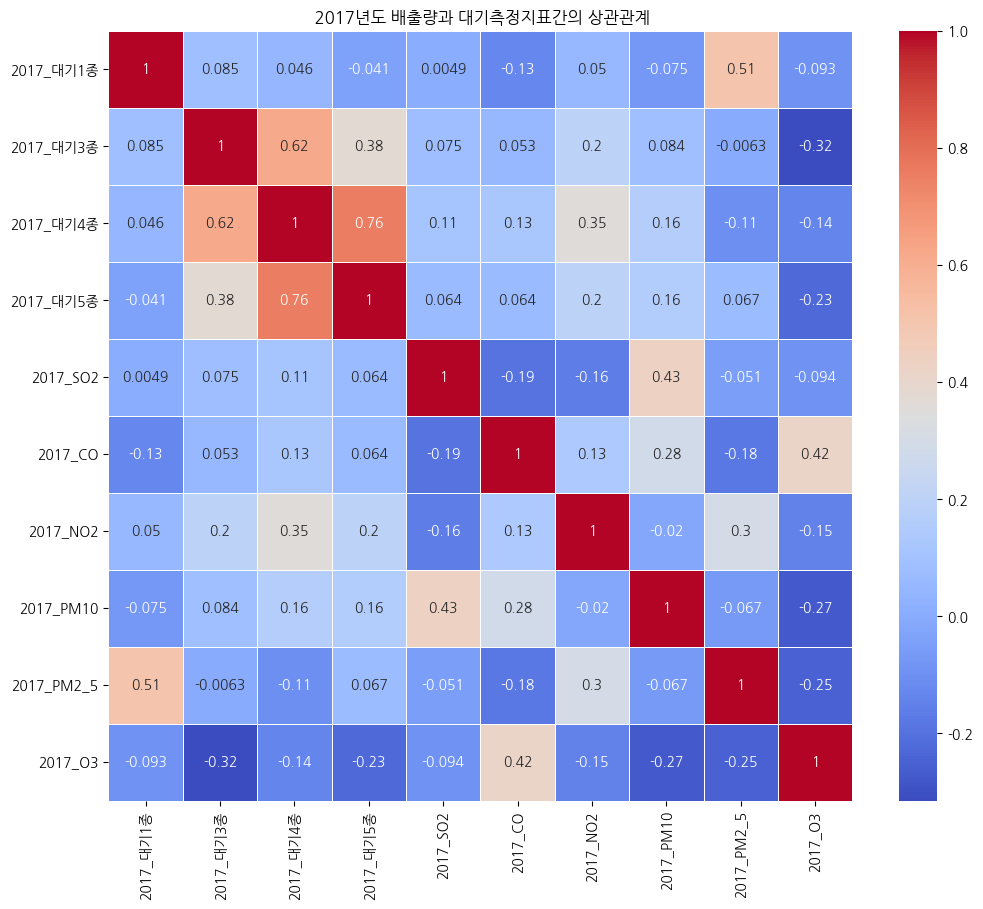

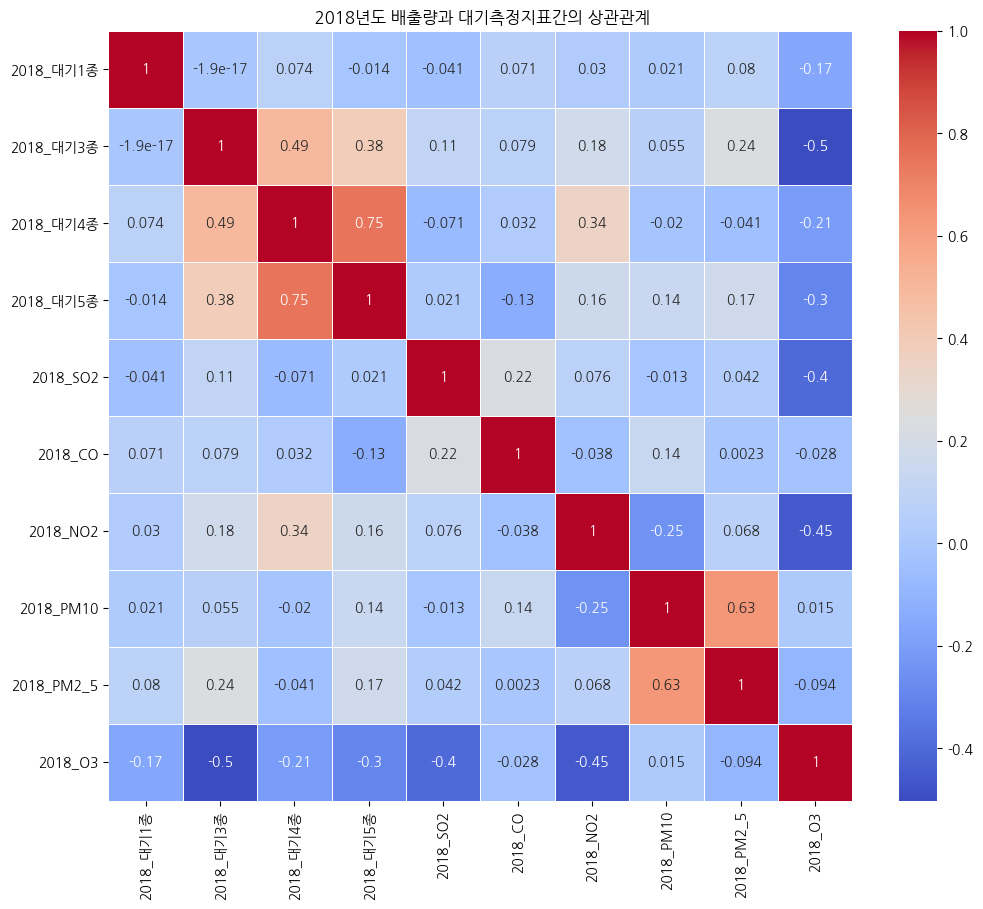

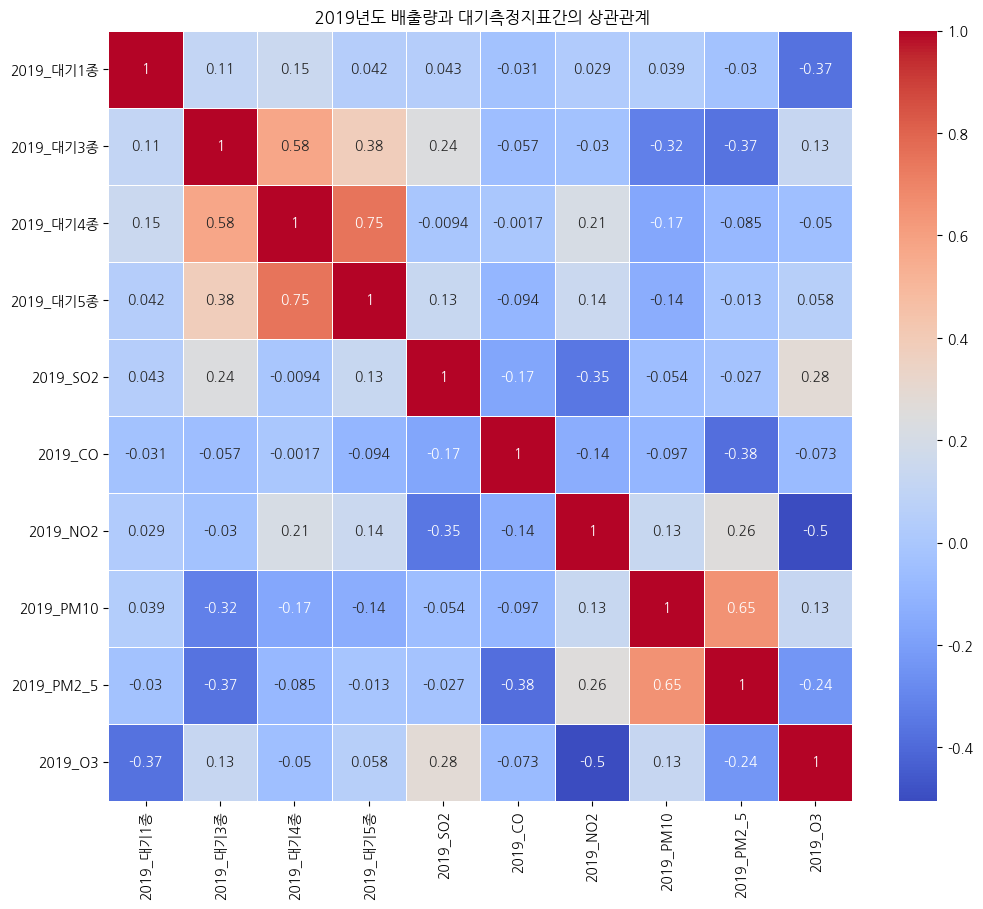

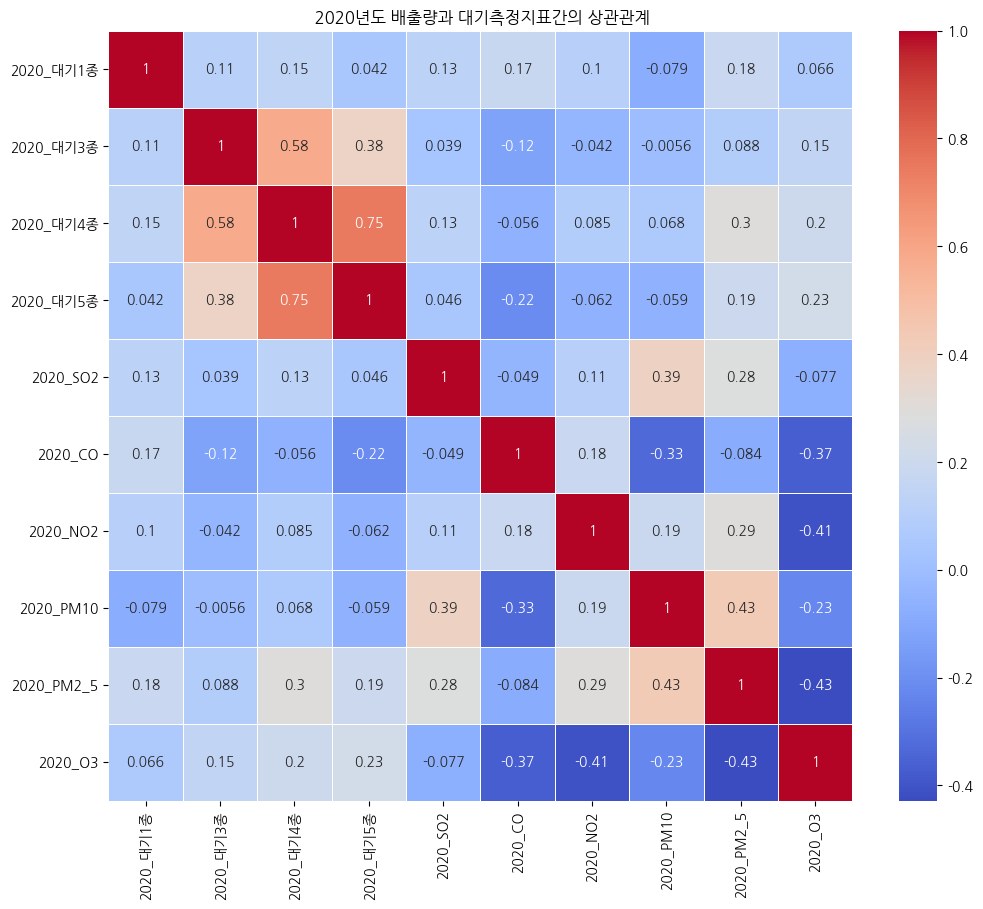

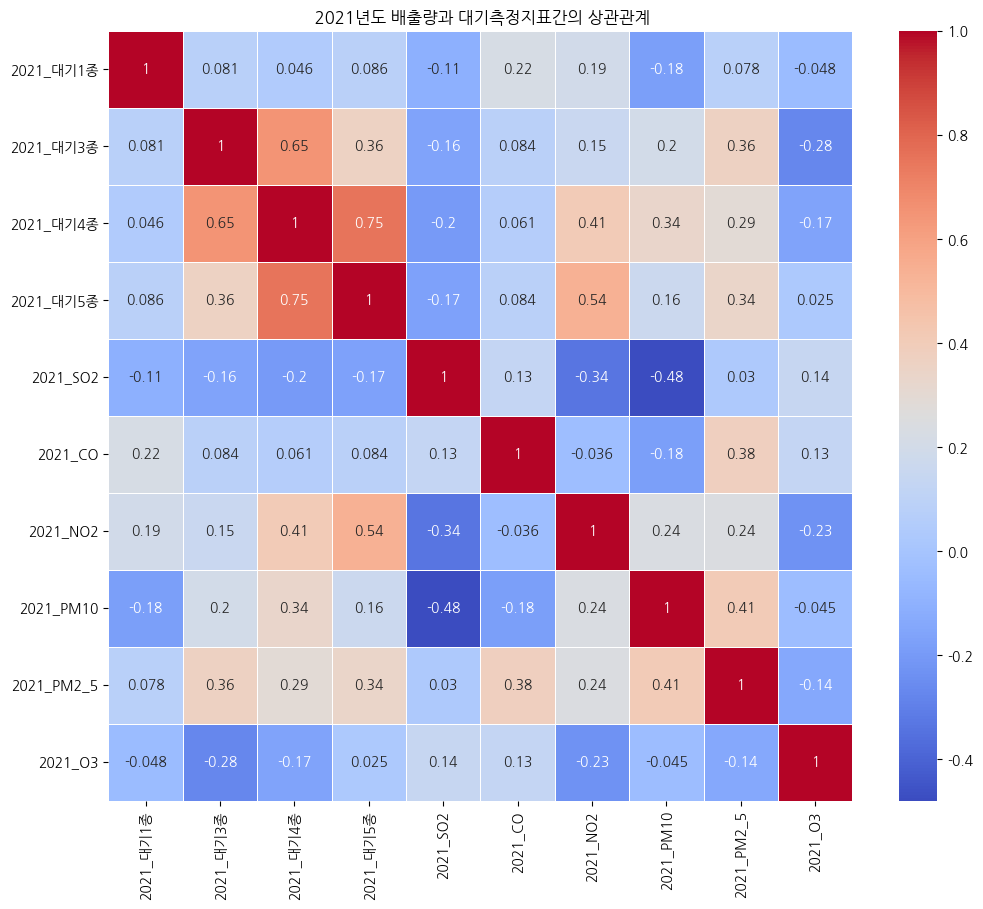

In [46]:
df_combined = pd.merge(df_air_quality, df_discharge, on='구분별', how='inner')
df_combined.replace('-', 0, inplace=True)
df_combined = df_combined.apply(pd.to_numeric, errors='ignore')

# 연도별 비교 분석
for year in years:
    # 해당 연도의 데이터 추출
    columns_to_compare = [
        f'{year}_대기1종', f'{year}_대기3종', f'{year}_대기4종', f'{year}_대기5종'
    ]
    air_quality_columns = [col for col in df_air_quality.columns if col.startswith(str(year))]

    # 해당 연도의 데이터프레임 생성
    df_year = df_combined[['구분별'] + columns_to_compare + air_quality_columns]

    # '구분별' 열 제거
    df_year = df_year.drop(columns=['구분별'])

    # 상관관계 분석
    correlation_matrix = df_year.corr()

    # 상관 행렬 히트맵 시각화
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f' {year}년도 배출량과 대기측정지표간의 상관관계')
    plt.show()




In [3]:
df_air_quality.isna().sum()

구분별(1)    0
2015      0
2015.1    0
2015.2    0
2015.3    0
2015.4    0
2015.5    0
2016      0
2016.1    0
2016.2    0
2016.3    0
2016.4    0
2016.5    0
2017      0
2017.1    0
2017.2    0
2017.3    0
2017.4    0
2017.5    0
2018      0
2018.1    0
2018.2    0
2018.3    0
2018.4    0
2018.5    0
2019      0
2019.1    0
2019.2    0
2019.3    0
2019.4    0
2019.5    0
2020      0
2020.1    0
2020.2    0
2020.3    0
2020.4    0
2020.5    0
2021      0
2021.1    0
2021.2    0
2021.3    0
2021.4    0
2021.5    0
2022      0
2022.1    0
2022.2    0
2022.3    0
2022.4    0
2022.5    0
dtype: int64

## 분석하기

## 공공데이터수질

In [2]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import koreanize_matplotlib
file_path = '수질현황_20240531183502.csv'

# CSV 파일을 데이터프레임으로 읽어오기
df = pd.read_csv(file_path)

# 데이터프레임 출력
df

수질현황별(1)    2006       2006.1         2006.2                2006.3  \
0   수질현황별(1)  수온 (℃)  수소이온농도 (pH)  용존산소 DO (㎎/ℓ)  생물화학적산소요구량 BOD (㎎/ℓ)   
1         암사    14.0          8.3           10.9                   1.6   
2         구의    13.8          8.3           11.0                   1.7   
3         잠실    14.0          8.4           11.1                   1.9   
4         보광    14.7          7.5            9.1                   5.1   
5        노량진    14.6          7.5            8.9                   4.0   
6        영등포    14.8          7.5            9.3                   3.8   
7         가양    14.7          7.5            8.5                   3.2   
8         행주    15.0          7.4            8.7                   4.7   
9        탄천6    17.8          7.3            6.8                  23.6   
10      중랑천6    16.9          7.6            8.1                  13.3   
11     안양천10    15.5          7.5            7.0                   8.8   
12        뚝도    14.3          7.8           10.3                   3.7   
13       팔당댐    12.8          7.8           11.2                   1.2   
14       홍제천    16.9          8.1           13.4                   3.2   
15       양재천    14.5          7.8            9.3                   4.8   
16       정릉천    15.1          8.5           15.4                   1.8   
17       도림천    13.8          7.6           11.3                   5.0   
18      목감천1    15.6          8.2           11.1                  19.5   
19       고덕천    13.1          8.3           13.0                   2.6   
20       성내천    15.0          8.1            9.5                   4.8   
21    청계천(1)    13.2          7.5           10.9                   0.9   
22    청계천(2)       -            -              -                     -   
23    청계천(3)    14.5          7.5           10.5                   1.7   
24       성북천    15.2          7.5           13.3                   1.3   
25       우이천    12.7          4.8            7.1                   2.3   

                2006.4         2006.5            2006.6    2007       2007.1  \
0   화학적산소요구량 COD (㎎/ℓ)  부유물질 SS (㎎/ℓ)  총대장균군 (MPN/100㎖)  수온 (℃)  수소이온농도 (pH)   
1                  3.5            8.0               343    13.7          8.1   
2                  3.5            8.2               513    13.6          8.1   
3                  3.7            8.5               404    13.5          8.1   
4                  5.2            9.5              7255    14.0          7.7   
5                  5.1           10.2              7321    14.5          7.5   
6                  5.1            9.0              3108    13.9          7.6   
7                  5.0           11.0              3485    14.5          7.5   
8                  5.7            9.3              5253    14.5          7.6   
9                 13.3           18.5             58792    18.1          7.4   
10                11.5           11.7            393333    18.1          7.2   
11                 9.8           11.7             29042    32.0          7.7   
12                 4.4            9.6              3168    13.8          7.8   
13                 3.3           11.1              1238    13.2          8.0   
14                 5.5            6.6            905958    17.7          7.9   
15                 7.0            8.1             48142    13.9          7.3   
16                 3.3            1.3            163025    14.9          7.7   
17                 8.0            4.1           1020727    17.8          7.7   
18                13.3           24.7           1887308    15.3          7.7   
19                 4.1            2.8             33109       -          7.7   
20                 5.2            9.3            198800    14.8          7.7   
21                 2.3            2.8                76    13.9          8.0   
22                   -              -                 -    14.8          7.9   
23                 2.9            3.0             86025    14.8          7.8   
24   

In [6]:
df.columns

Index(['수질현황별(1)', '2006', '2006.1', '2006.2', '2006.3', '2006.4', '2006.5',
       '2006.6', '2007', '2007.1',
       ...
       '2022.4', '2022.5', '2022.6', '2023', '2023.1', '2023.2', '2023.3',
       '2023.4', '2023.5', '2023.6'],
      dtype='object', length=127)

In [7]:
df.head(1)

수질현황별(1)    2006       2006.1         2006.2                2006.3  \
0  수질현황별(1)  수온 (℃)  수소이온농도 (pH)  용존산소 DO (㎎/ℓ)  생물화학적산소요구량 BOD (㎎/ℓ)   

               2006.4         2006.5            2006.6    2007       2007.1  \
0  화학적산소요구량 COD (㎎/ℓ)  부유물질 SS (㎎/ℓ)  총대장균군 (MPN/100㎖)  수온 (℃)  수소이온농도 (pH)   

   ...              2022.4         2022.5            2022.6    2023  \
0  ...  화학적산소요구량 COD (㎎/ℓ)  부유물질 SS (㎎/ℓ)  총대장균군 (MPN/100㎖)  수온 (℃)   

        2023.1         2023.2                2023.3              2023.4  \
0  수소이온농도 (pH)  용존산소 DO (㎎/ℓ)  생물화학적산소요구량 BOD (㎎/ℓ)  화학적산소요구량 COD (㎎/ℓ)   

          2023.5            2023.6  
0  부유물질 SS (㎎/ℓ)  총대장균군 (MPN/100㎖)  

[1 rows x 127 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Columns: 127 entries, 수질현황별(1) to 총대장균군 (MPN/100㎖)
dtypes: object(127)
memory usage: 24.9+ KB


In [11]:
df.describe()

0      수질현황별(1) 수온 (℃) 수소이온농도 (pH) 용존산소 DO (㎎/ℓ) 생물화학적산소요구량 BOD (㎎/ℓ)  \
count        25     25          25            25                   25   
unique       25     19          12            22                   22   
top          암사   14.0         7.5          10.9                  3.2   
freq          1      2           8             2                    2   

0      화학적산소요구량 COD (㎎/ℓ) 부유물질 SS (㎎/ℓ) 총대장균군 (MPN/100㎖) 수온 (℃) 수소이온농도 (pH)  \
count                  25            25               25     25          25   
unique                 20            22               25     17          11   
top                   3.5           2.8              343   14.8         7.7   
freq                    2             2                1      3           8   

0       ... 화학적산소요구량 COD (㎎/ℓ) 부유물질 SS (㎎/ℓ) 총대장균군 (MPN/100㎖) 수온 (℃)  \
count   ...                 25            25               25     25   
unique  ...                 20            22               25     19   
top     ...                2.4           3.7            26482   15.9   
freq    ...                  2             2                1      2   

0      수소이온농도 (pH) 용존산소 DO (㎎/ℓ) 생물화학적산소요구량 BOD (㎎/ℓ) 화학적산소요구량 COD (㎎/ℓ)  \
count           25            25                   25                 25   
unique          13            20                   14                 22   
top            8.0          10.5                  1.1                3.6   
freq             4             3                    3                  4   

0      부유물질 SS (㎎/ℓ) 총대장균군 (MPN/100㎖)  
count             25               25  
unique            22               25  
top              5.6             8116  
freq               2                1  

[4 rows x 127 columns]

In [13]:
df.isna().sum()

0
수질현황별(1)                0
수온 (℃)                  0
수소이온농도 (pH)             0
용존산소 DO (㎎/ℓ)           0
생물화학적산소요구량 BOD (㎎/ℓ)    0
                       ..
용존산소 DO (㎎/ℓ)           0
생물화학적산소요구량 BOD (㎎/ℓ)    0
화학적산소요구량 COD (㎎/ℓ)      0
부유물질 SS (㎎/ℓ)           0
총대장균군 (MPN/100㎖)        0
Length: 127, dtype: int64

In [5]:
df_tidy = df.melt(id_vars=['수질현황별(1)'], var_name='지표', value_name='값')

# 지표 이름에서 연도와 측정 지표 분리
df_tidy['연도'] = df_tidy['지표'].str.extract(r'(\d{4})')[0].astype(int)
df_tidy['측정지표'] = df_tidy['지표'].str.extract(r'(\.(\d))')[1].fillna(0).astype(int)

# 측정지표 컬럼을 구체적인 지표 이름으로 매핑
지표_맵핑 = {
    0: '수온 (℃)',
    1: '수소이온농도 (pH)',
    2: '용존산소 DO (㎎/ℓ)',
    3: '생물화학적산소요구량 BOD (㎎/ℓ)',
    4: '화학적산소요구량 COD (㎎/ℓ)',
    5: '부유물질 SS (㎎/ℓ)',
    6: '총대장균군 (MPN/100㎖)'
}

df_tidy['측정지표'] = df_tidy['측정지표'].map(지표_맵핑)

print(df_tidy.head(50))

    수질현황별(1)      지표            값    연도         측정지표
0   수질현황별(1)    2006       수온 (℃)  2006       수온 (℃)
1         암사    2006         14.0  2006       수온 (℃)
2         구의    2006         13.8  2006       수온 (℃)
3         잠실    2006         14.0  2006       수온 (℃)
4         보광    2006         14.7  2006       수온 (℃)
5        노량진    2006         14.6  2006       수온 (℃)
6        영등포    2006         14.8  2006       수온 (℃)
7         가양    2006         14.7  2006       수온 (℃)
8         행주    2006         15.0  2006       수온 (℃)
9        탄천6    2006         17.8  2006       수온 (℃)
10      중랑천6    2006         16.9  2006       수온 (℃)
11     안양천10    2006         15.5  2006       수온 (℃)
12        뚝도    2006         14.3  2006       수온 (℃)
13       팔당댐    2006         12.8  2006       수온 (℃)
14       홍제천    2006         16.9  2006       수온 (℃)
15       양재천    2006         14.5  2006       수온 (℃)
16       정릉천    2006         15.1  2006       수온 (℃)
17       도림천    2006         13.8  2006       

In [6]:
summary = df_tidy.groupby(['연도', '측정지표'])['값'].describe()

summary

count unique               top freq
연도   측정지표                                                    
2006 부유물질 SS (㎎/ℓ)           26     23               2.8    2
     생물화학적산소요구량 BOD (㎎/ℓ)    26     23               1.7    2
     수소이온농도 (pH)             26     13               7.5    8
     수온 (℃)                  26     20              13.8    2
     용존산소 DO (㎎/ℓ)           26     23              11.1    2
...                         ...    ...               ...  ...
2023 수소이온농도 (pH)             26     14               8.0    4
     수온 (℃)                  26     20              15.3    2
     용존산소 DO (㎎/ℓ)           26     21              10.5    3
     총대장균군 (MPN/100㎖)        26     26  총대장균군 (MPN/100㎖)    1
     화학적산소요구량 COD (㎎/ℓ)      26     23               3.6    4

[126 rows x 4 columns]

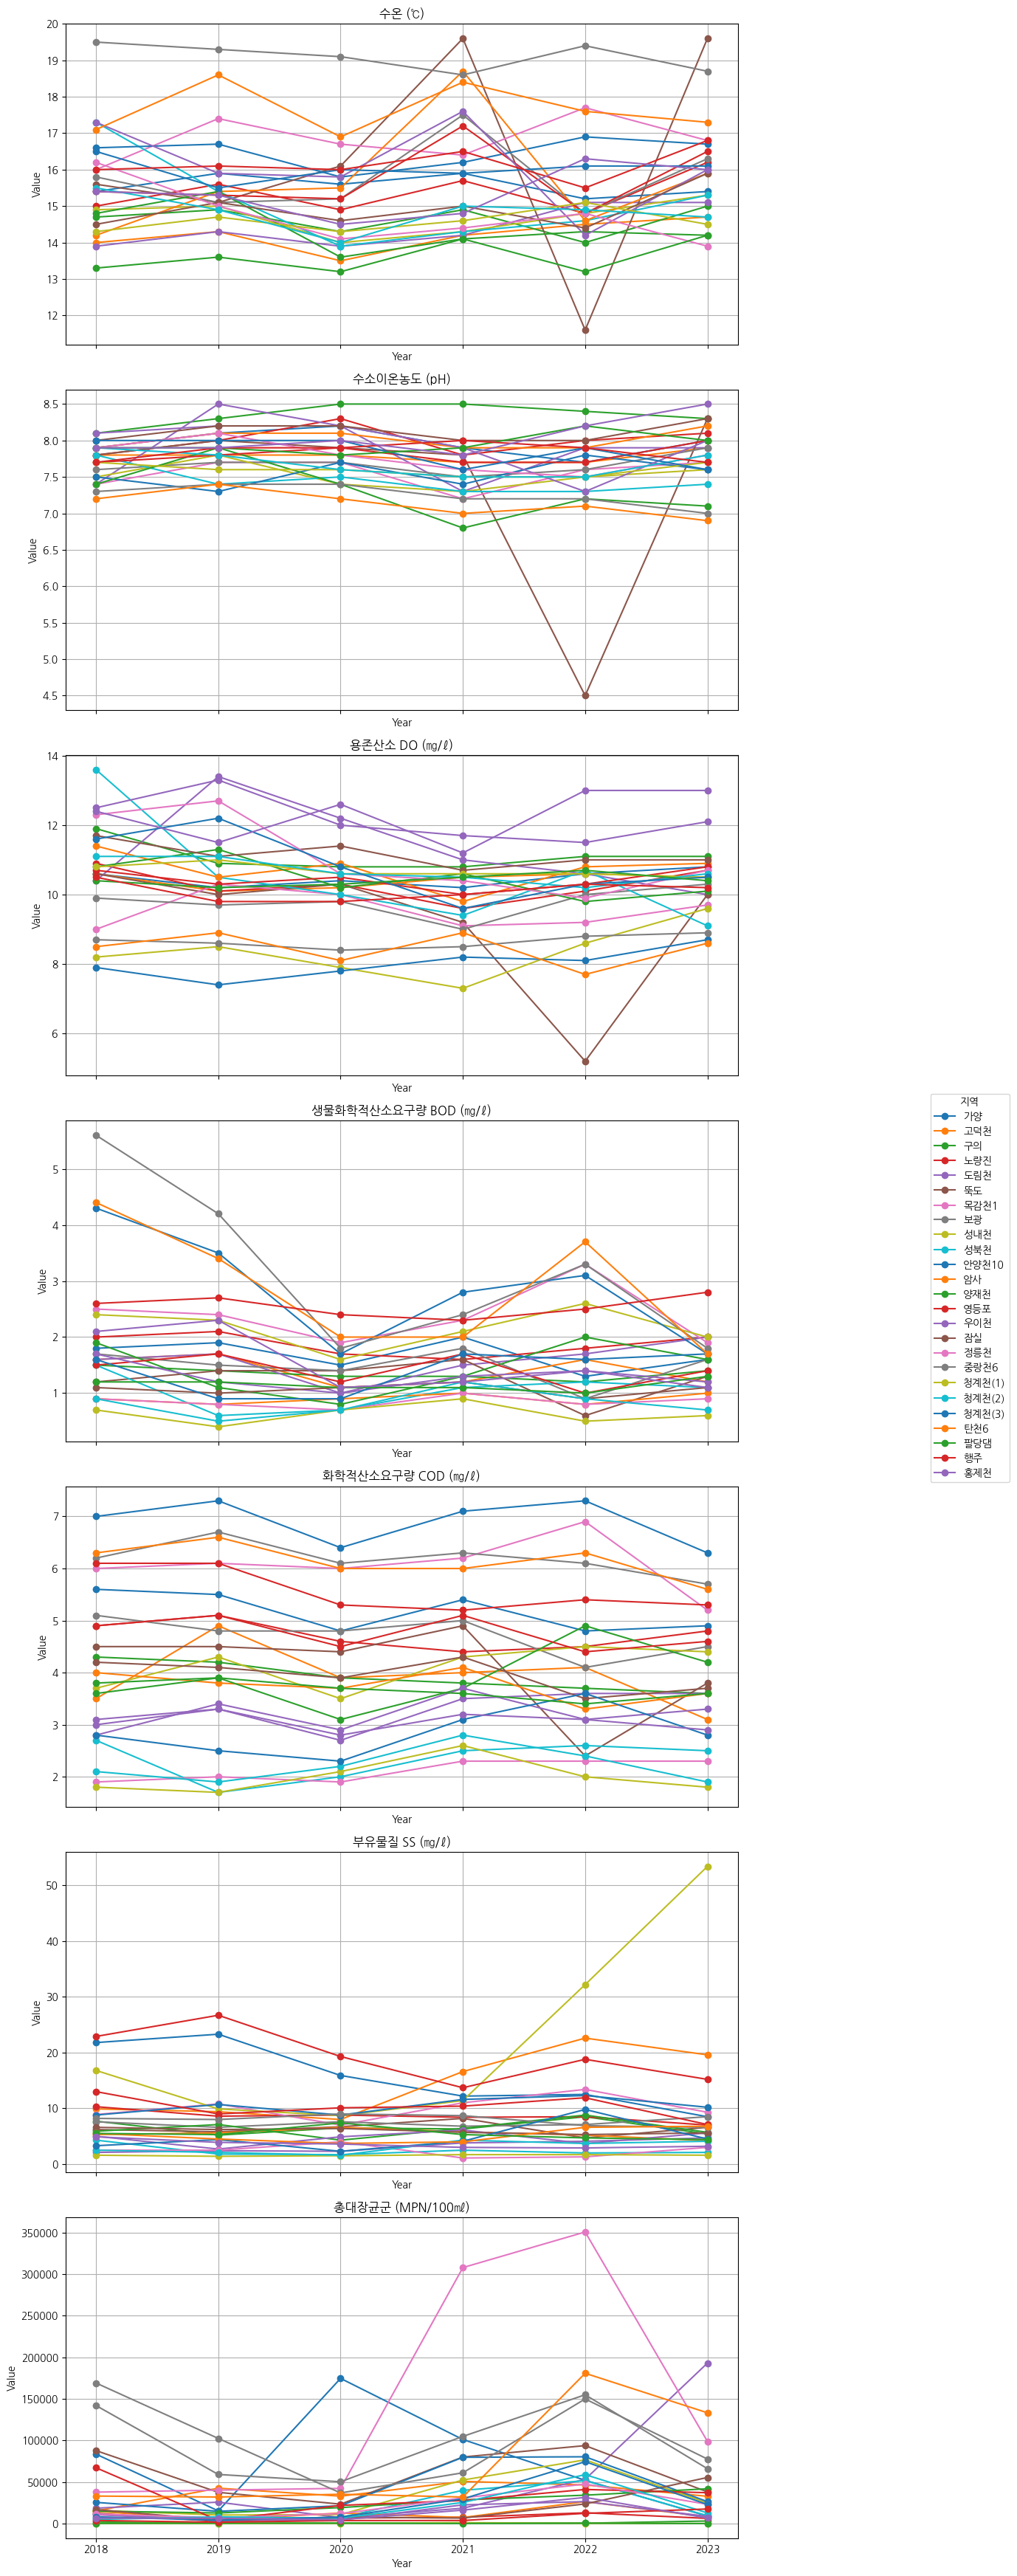

In [8]:
import matplotlib.pyplot as plt


# 2018년부터 2023년까지 데이터 필터링
df_tidy = df_tidy[df_tidy['연도'].between(2018, 2023)]

# 값이 숫자 형식인지 확인하고 변환
df_tidy['값'] = pd.to_numeric(df_tidy['값'], errors='coerce')

# 지역별로 피벗 테이블 생성
pivot_df = df_tidy.pivot_table(index=['연도', '수질현황별(1)'], columns='측정지표', values='값').reset_index()

# 서브플롯을 생성하여 각 지표별로 시각화
지표_리스트 = df_tidy['측정지표'].unique()
num_지표 = len(지표_리스트)

fig, axes = plt.subplots(num_지표, 1, figsize=(12, 5 * num_지표), sharex=True)
axes = axes.flatten()

for i, 지표 in enumerate(지표_리스트):
    for 지역 in pivot_df['수질현황별(1)'].unique():
        subset = pivot_df[pivot_df['수질현황별(1)'] == 지역]
        axes[i].plot(subset['연도'], subset[지표], marker='o', label=지역)
    axes[i].set_title(지표)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

# Legend를 별도로 생성하여 모든 지역이 표시되도록 설정
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.15, 0.5), title='지역')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [ ]:
수온 (°C)
높은 수온: 노량진, 도림천, 도림천1, 노원진 등의 지역에서 수온이 18°C 이상으로 상승하는 경향을 보입니다. 이는 여름철에 일시적으로 상승하는 패턴일 수 있습니다.
급격한 감소: 도림천에서 수온이 급격히 감소하는 경향이 보입니다. 이는 특정 환경적 요인이나 사건으로 인한 것으로 추측할 수 있습니다.

수소이온농도 (pH)
안정적인 패턴: 대부분의 지역에서 pH 값은 7.0에서 8.5 사이에서 안정적으로 유지되고 있습니다.
일시적 감소: 성내천, 안양천10 지역에서 pH 값이 일시적으로 7.0 이하로 떨어졌다가 회복하는 패턴이 보입니다. 이는 일시적인 오염 사건이나 특정 화학 물질의 유입을 시사할 수 있습니다.

용존산소 (DO)
일관된 패턴: 대부분의 지역에서 DO 값은 8.0 mg/L에서 12.0 mg/L 사이에서 안정적으로 유지되고 있습니다.
일부 감소: 구의, 성북천 지역에서는 DO 값이 일시적으로 8.0 mg/L 이하로 떨어지는 경향을 보입니다. 이는 수온 상승이나 오염물질 유입으로 인한 DO 감소일 수 있습니다.

생물화학적산소요구량 (BOD)
낮은 수준: 대부분의 지역에서 BOD 값은 1.0 mg/L에서 3.0 mg/L 사이로 비교적 낮은 수준을 유지하고 있습니다.
특정 지역의 급격한 변동: 청계천1에서 BOD 값이 5.0 mg/L 이상으로 매우 높게 나타나고 있습니다. 이는 해당 지역에서의 오염 문제를 시사합니다.

화학적산소요구량 (COD)
변동성: COD 값은 다양한 지역에서 변동성이 크며, 2.0 mg/L에서 7.0 mg/L 사이에서 변화합니다.
상승 경향: 노량진, 구의 지역에서는 COD 값이 상승하는 경향을 보이며, 이는 화학적 오염물질의 유입이 지속되고 있음을 나타냅니다.

부유물질 (SS)
일반적인 패턴: 대부분의 지역에서 SS 값은 10 mg/L 이하로 안정적입니다.
급격한 증가: 양재천에서 SS 값이 급격히 증가하여 50 mg/L 이상으로 치솟고 있습니다. 이는 침전물이 많거나 강우에 의해 유입된 오염물질이 많을 수 있습니다.

총대장균군 (MPN/100ml)
일반적인 수준: 대부분의 지역에서 총대장균군 수치는 50,000 MPN/100ml 이하로 비교적 낮게 유지됩니다.
급격한 변동: 노원진, 청계천(2), 목동천에서 총대장균군 수치가 300,000 MPN/100ml 이상으로 급격히 증가하는 패턴이 보입니다. 이는 하수 유입이나 오염원 유입을 시사합니다.

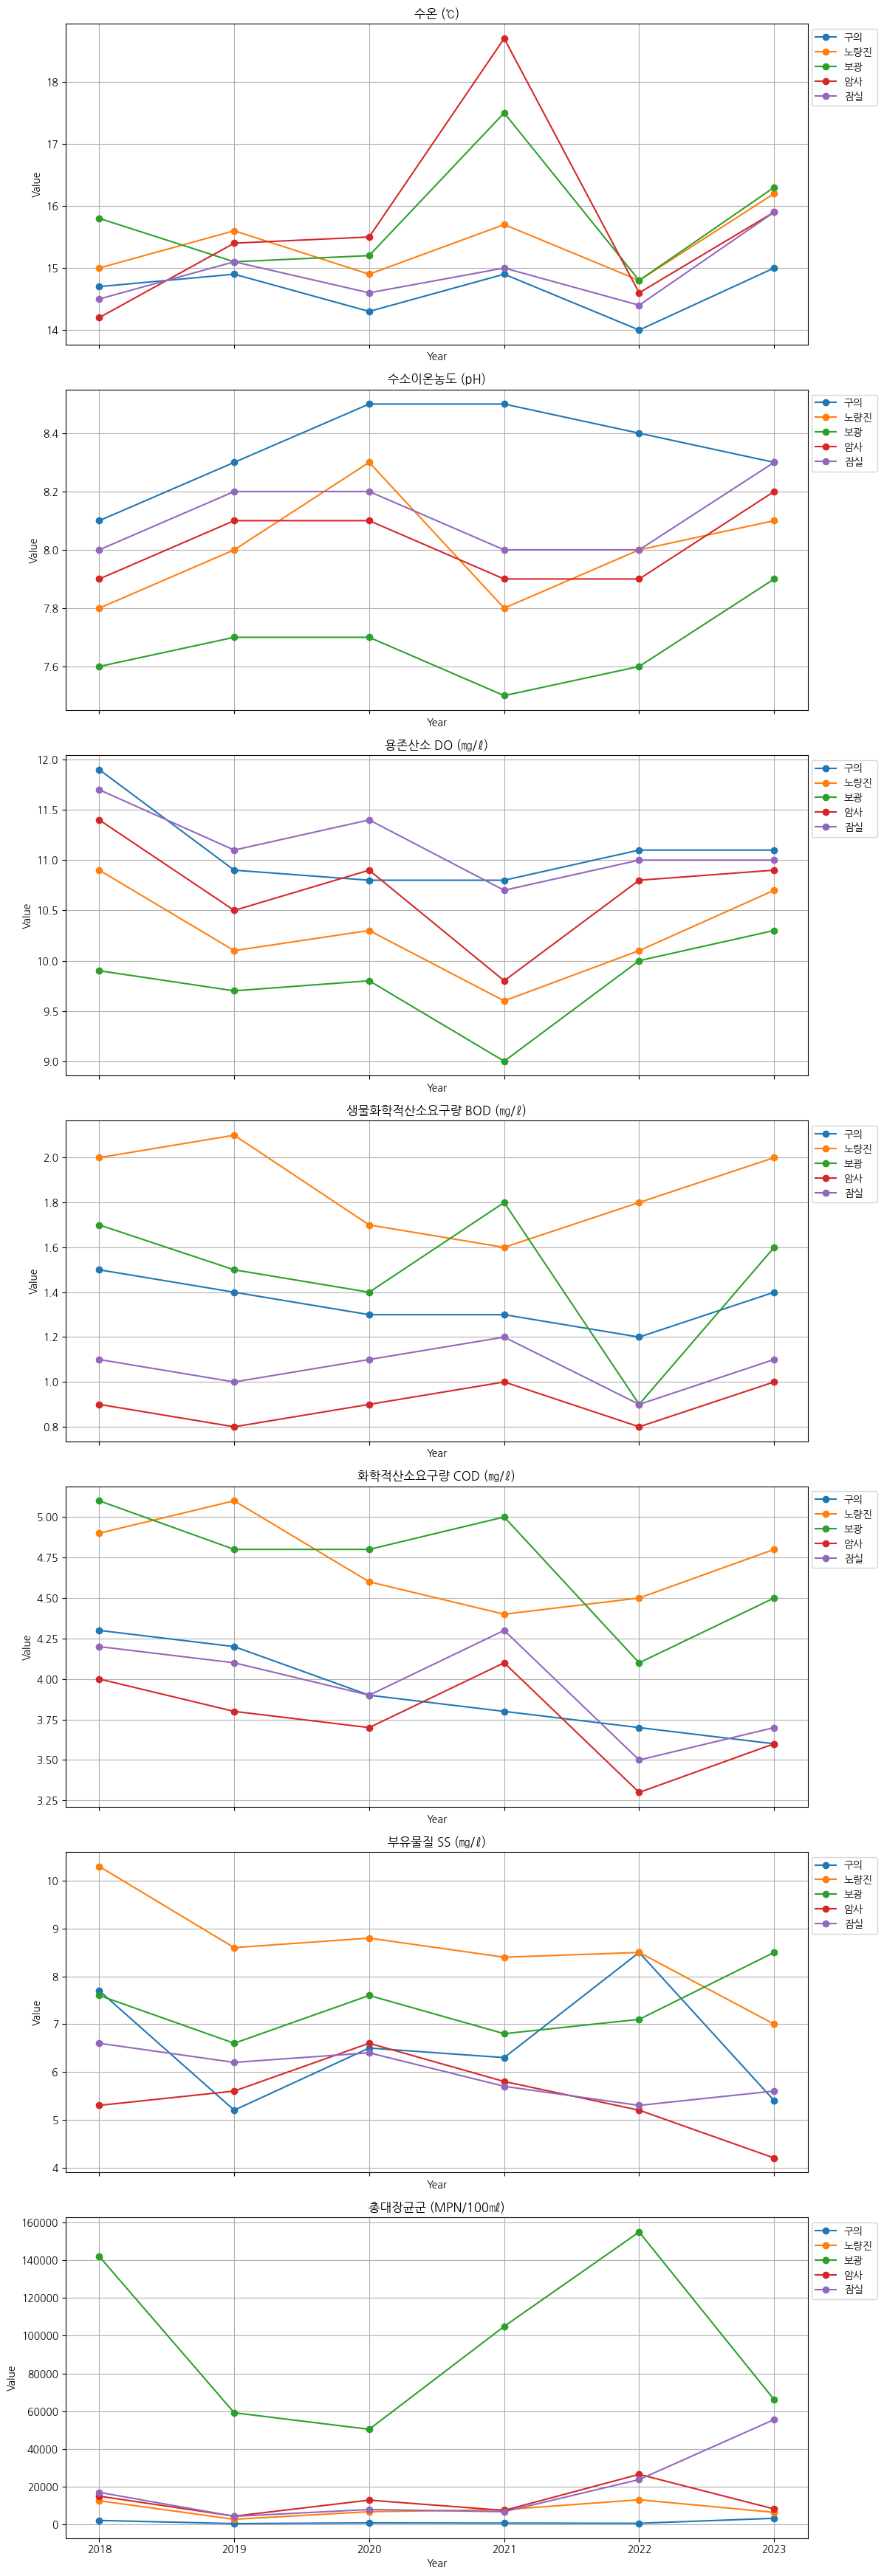

In [11]:
df_tidy = df_tidy[df_tidy['연도'].between(2018, 2023)]

# 값이 숫자 형식인지 확인하고 변환
df_tidy['값'] = pd.to_numeric(df_tidy['값'], errors='coerce')

# 특정 지역만 선택
selected_regions = ['암사', '구의', '잠실', '보광', '노량진']
df_tidy = df_tidy[df_tidy['수질현황별(1)'].isin(selected_regions)]

# 지역별로 피벗 테이블 생성
pivot_df = df_tidy.pivot_table(index=['연도', '수질현황별(1)'], columns='측정지표', values='값').reset_index()

# 서브플롯을 생성하여 각 지표별로 시각화
지표_리스트 = df_tidy['측정지표'].unique()
num_지표 = len(지표_리스트)

fig, axes = plt.subplots(num_지표, 1, figsize=(12, 5 * num_지표), sharex=True)
axes = axes.flatten()

for i, 지표 in enumerate(지표_리스트):
    for 지역 in pivot_df['수질현황별(1)'].unique():
        subset = pivot_df[pivot_df['수질현황별(1)'] == 지역]
        axes[i].plot(subset['연도'], subset[지표], marker='o', label=지역)
    axes[i].set_title(지표)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Value')
    axes[i].legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [48]:
# 기초 통계량 계산
summary_stats = df_tidy.groupby(['측정지표'])['값'].describe()
print(summary_stats)


                      count          mean           std   min       25%  \
측정지표                                                                      
부유물질 SS (㎎/ℓ)         150.0      7.726000      6.454429   1.1     4.100   
생물화학적산소요구량 BOD (㎎/ℓ)  150.0      1.606667      0.823943   0.4     1.100   
수소이온농도 (pH)           150.0      7.736667      0.433561   4.5     7.500   
수온 (℃)                150.0     15.534000      1.441561  11.6    14.525   
용존산소 DO (㎎/ℓ)         150.0     10.286000      1.279840   5.2     9.800   
총대장균군 (MPN/100㎖)      150.0  37253.626667  52625.912360  66.0  6694.750   
화학적산소요구량 COD (㎎/ℓ)    150.0      4.103333      1.386968   1.7     3.100   

                           50%        75%       max  
측정지표                                                 
부유물질 SS (㎎/ℓ)             6.40      8.875      53.4  
생물화학적산소요구량 BOD (㎎/ℓ)      1.45      1.900       5.6  
수소이온농도 (pH)               7.80      8.000       8.5  
수온 (℃)                   15.30     16.175      19.6  


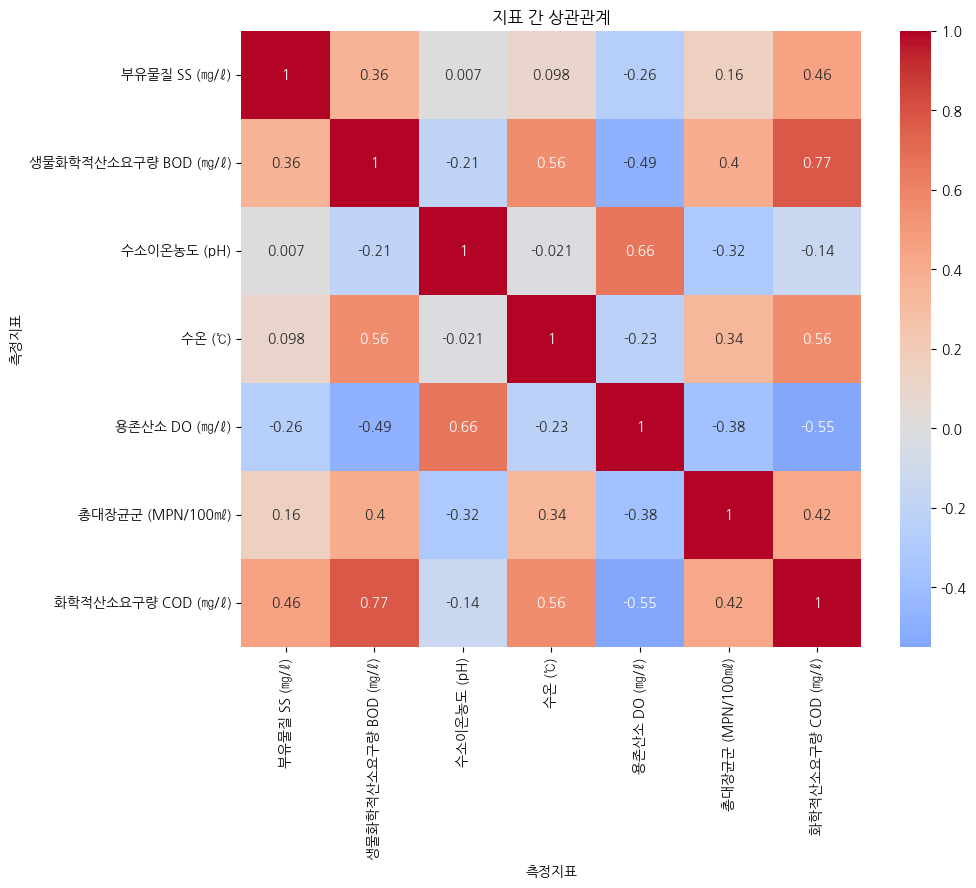

In [49]:
import seaborn as sns
import numpy as np

# 상관관계 행렬 계산
pivot_df_corr = pivot_df.drop(columns=['연도', '수질현황별(1)'])
correlation_matrix = pivot_df_corr.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('지표 간 상관관계')
plt.show()

In [ ]:
#수온과 용존산소(DO) 사이의 상관계수는 -0.23으로, 수온이 높아질수록 용존산소가 감소하는 경향을 보입니다.


#COD와 BOD 사이의 상관계수는 0.77로 매우 높습니다. 이는 두 변수 간에 강한 양의 상관관계가 있음을 의미합니다.
#pH와 DO 사이의 상관계수는 0.66으로 높은 편입니다. 이는 pH 값이 증가할수록 DO 값도 증가하는 경향을 나타냅니다.

#SS와 pH (0.007), SS와 수온 (0.098) 사이의 상관관계는 거의 없습니다.

In [12]:
# IQR 방법을 사용한 이상치 탐지
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# 모든 지표에 대해 이상치 탐지
for 지표 in df_tidy['측정지표'].unique():
    outliers = detect_outliers_iqr(df_tidy[df_tidy['측정지표'] == 지표], '값')
    print(f'{지표} 이상치:\n', outliers)

수온 (℃) 이상치:
      수질현황별(1)    지표     값    연도    측정지표
2731       암사  2021  18.7  2021  수온 (℃)
2734       보광  2021  17.5  2021  수온 (℃)
수소이온농도 (pH) 이상치:
 Empty DataFrame
Columns: [수질현황별(1), 지표, 값, 연도, 측정지표]
Index: []
용존산소 DO (㎎/ℓ) 이상치:
 Empty DataFrame
Columns: [수질현황별(1), 지표, 값, 연도, 측정지표]
Index: []
생물화학적산소요구량 BOD (㎎/ℓ) 이상치:
 Empty DataFrame
Columns: [수질현황별(1), 지표, 값, 연도, 측정지표]
Index: []
화학적산소요구량 COD (㎎/ℓ) 이상치:
 Empty DataFrame
Columns: [수질현황별(1), 지표, 값, 연도, 측정지표]
Index: []
부유물질 SS (㎎/ℓ) 이상치:
 Empty DataFrame
Columns: [수질현황별(1), 지표, 값, 연도, 측정지표]
Index: []
총대장균군 (MPN/100㎖) 이상치:
      수질현황별(1)      지표         값    연도              측정지표
2344       보광  2018.6  142055.0  2018  총대장균군 (MPN/100㎖)
2526       보광  2019.6   59142.0  2019  총대장균군 (MPN/100㎖)
2890       보광  2021.6  104936.0  2021  총대장균군 (MPN/100㎖)
3072       보광  2022.6  155000.0  2022  총대장균군 (MPN/100㎖)
3254       보광  2023.6   66083.0  2023  총대장균군 (MPN/100㎖)


In [18]:
import pandas as pd
import koreanize_matplotlib
file_path = '수질오염설치시설.csv'

# CSV 파일을 데이터프레임으로 읽어오기
df_license = pd.read_csv(file_path)

# 데이터프레임 출력
df_license.head()

개방자치단체코드                관리번호       인허가일자  인허가취소일자  영업상태코드  영업상태명  상세영업상태코드  \
0   3170000  317000025201800004  2018-09-27      NaN       1  영업/정상        11   
1   3090000  309000025200600006  2006-07-05      NaN       1  영업/정상        11   
2   3090000  309000025200500001  2005-01-12      NaN       1  영업/정상        11   
3   3190000  319000025200400038  2004-07-26      NaN       1  영업/정상        11   
4   3090000  309000025200300102  2002-09-06      NaN       1  영업/정상        11   

  상세영업상태명 폐업일자  휴업시작일자  ...        좌표정보(X)        좌표정보(Y) 환경업무구분명  업종구분명 종별명  \
0      영업  NaN     NaN  ...  189419.091887  441207.655087     NaN    NaN NaN   
1      영업  NaN     NaN  ...  203946.218925  462919.219463     NaN    NaN NaN   
2      영업  NaN     NaN  ...  201067.062952  461074.692107     NaN    NaN NaN   
3      영업  NaN     NaN  ...  201543.962547  446856.814680     NaN    NaN NaN   
4      영업  NaN     NaN  ...  203089.442774  461770.488759     NaN    NaN NaN   

  주생산품명 배출시설조업시간 배출시설연간가동일수 방지시설조업시간 방지시설연간가동일수  
0   NaN      NaN        NaN      NaN        NaN  
1   NaN      NaN        NaN      NaN        NaN  
2   NaN      NaN        NaN      NaN        NaN  
3   NaN      NaN        NaN      NaN        NaN  
4   NaN      NaN        NaN      NaN        NaN  

[5 rows x 33 columns]

In [30]:

df_license_active = df_license[df_license['영업상태코드'] == 1]
df_license_active['구'] = df_license_active['지번주소'].str.extract(r'서울특별시\s*(\S+구)')

gu_counts_dict = {}

# 구명별로 개수 세기
for gu in df_license_active['구']:
    if pd.notna(gu):  # 구명이 유효한 경우에만 처리
        if gu in gu_counts_dict:
            gu_counts_dict[gu] += 1
        else:
            gu_counts_dict[gu] = 1

# 딕셔너리를 데이터프레임으로 변환
gu_counts_df = pd.DataFrame(list(gu_counts_dict.items()), columns=['구', '개수'])

# 결과 출력
gu_counts_df


<ipython-input-30-f4c98afc7387>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_license_active['구'] = df_license_active['지번주소'].str.extract(r'서울특별시\s*(\S+구)')


구   개수
0    금천구   96
1    도봉구   88
2    동작구  103
3    종로구  483
4    강남구  252
5    강서구  403
6    마포구  222
7    성동구  186
8    강북구   62
9    송파구  207
10   구로구  228
11   은평구  138
12   용산구   75
13   성북구  111
14   강동구  111
15   양천구  111
16   서초구  250
17    중구   34
18   중랑구   95
19  동대문구  113
20  영등포구  157
21  서대문구   76
22   광진구   93
23   관악구  157
24   노원구  126

In [34]:
df_license_active['인허가일자'].isna().sum()

0

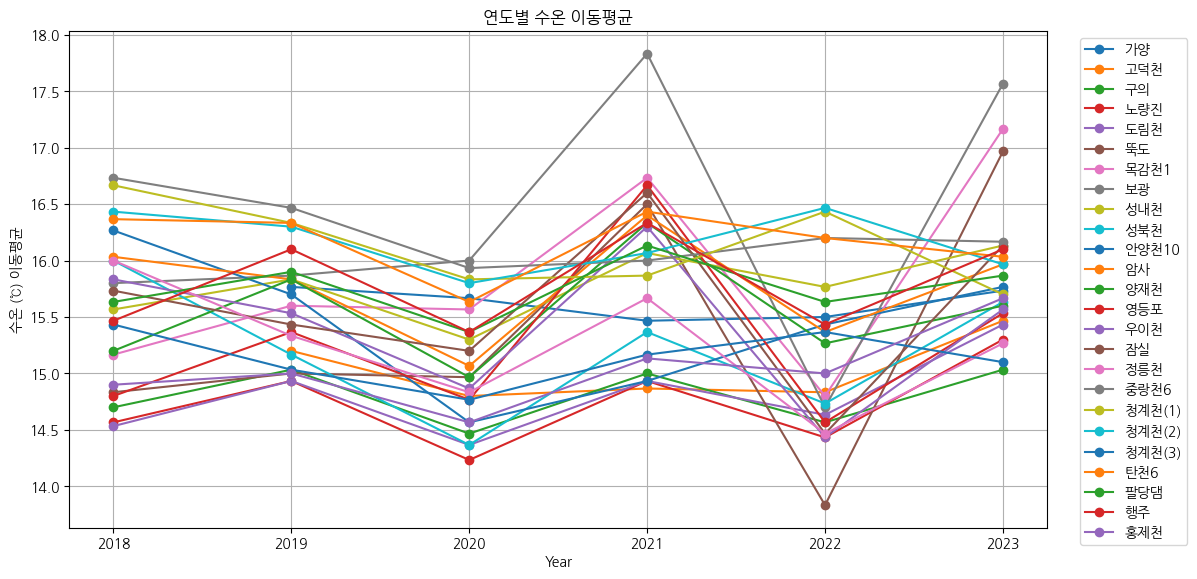

In [51]:
# 이동 평균을 이용한 시계열 분석
pivot_df['수온 (℃)_이동평균'] = pivot_df['수온 (℃)'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
for 지역 in pivot_df['수질현황별(1)'].unique():
    subset = pivot_df[pivot_df['수질현황별(1)'] == 지역]
    plt.plot(subset['연도'], subset['수온 (℃)_이동평균'], marker='o', label=지역)
plt.xlabel('Year')
plt.ylabel('수온 (℃) 이동평균')
plt.title('연도별 수온 이동평균')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

## Titanic

 RMS 타이타닉호: 1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 중, 4월 15일 빙산과 충돌하여 침몰

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")
titanic = sns.load_dataset('titanic')
titanic.head()



survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.1 MB/s eta 0:00:00


In [4]:
%config InlineBackend.figure_format="retina"

In [5]:
import koreanize_matplotlib

분석

In [6]:
print(titanic.isna().sum()) # 타이타닉 null 확인, 나이와 객실번호,지역 있는 거 확

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [7]:
titanic.columns # 컬럼명 확인

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
titanic.info() # info 확인= data타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
titanic.describe() #요약정보 확인

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [11]:
titanic.describe(include=['O']) #범주형 확인

sex embarked  who  embark_town alive
count    891      889  891          889   891
unique     2        3    3            3     2
top     male        S  man  Southampton    no
freq     577      644  537          644   549

In [12]:
titanic_numeric = pd.get_dummies(titanic) #원-핫 인코딩으로 범주형을 숫자형으로

In [13]:
correlation_matrix = titanic_numeric.corr()
print(correlation_matrix)

                         survived    pclass       age     sibsp     parch  \
survived                 1.000000 -0.338481 -0.077221 -0.035322  0.081629   
pclass                  -0.338481  1.000000 -0.369226  0.083081  0.018443   
age                     -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
sibsp                   -0.035322  0.083081 -0.308247  1.000000  0.414838   
parch                    0.081629  0.018443 -0.189119  0.414838  1.000000   
fare                     0.257307 -0.549500  0.096067  0.159651  0.216225   
adult_male              -0.557080  0.094035  0.280328 -0.253586 -0.349943   
alone                   -0.203367  0.135207  0.198270 -0.584471 -0.583398   
sex_female               0.543351 -0.131900 -0.093254  0.114631  0.245489   
sex_male                -0.543351  0.131900  0.093254 -0.114631 -0.245489   
embarked_C               0.168240 -0.243292  0.036261 -0.059528 -0.011069   
embarked_Q               0.003650  0.221009 -0.022405 -0.026354 -0.081228   

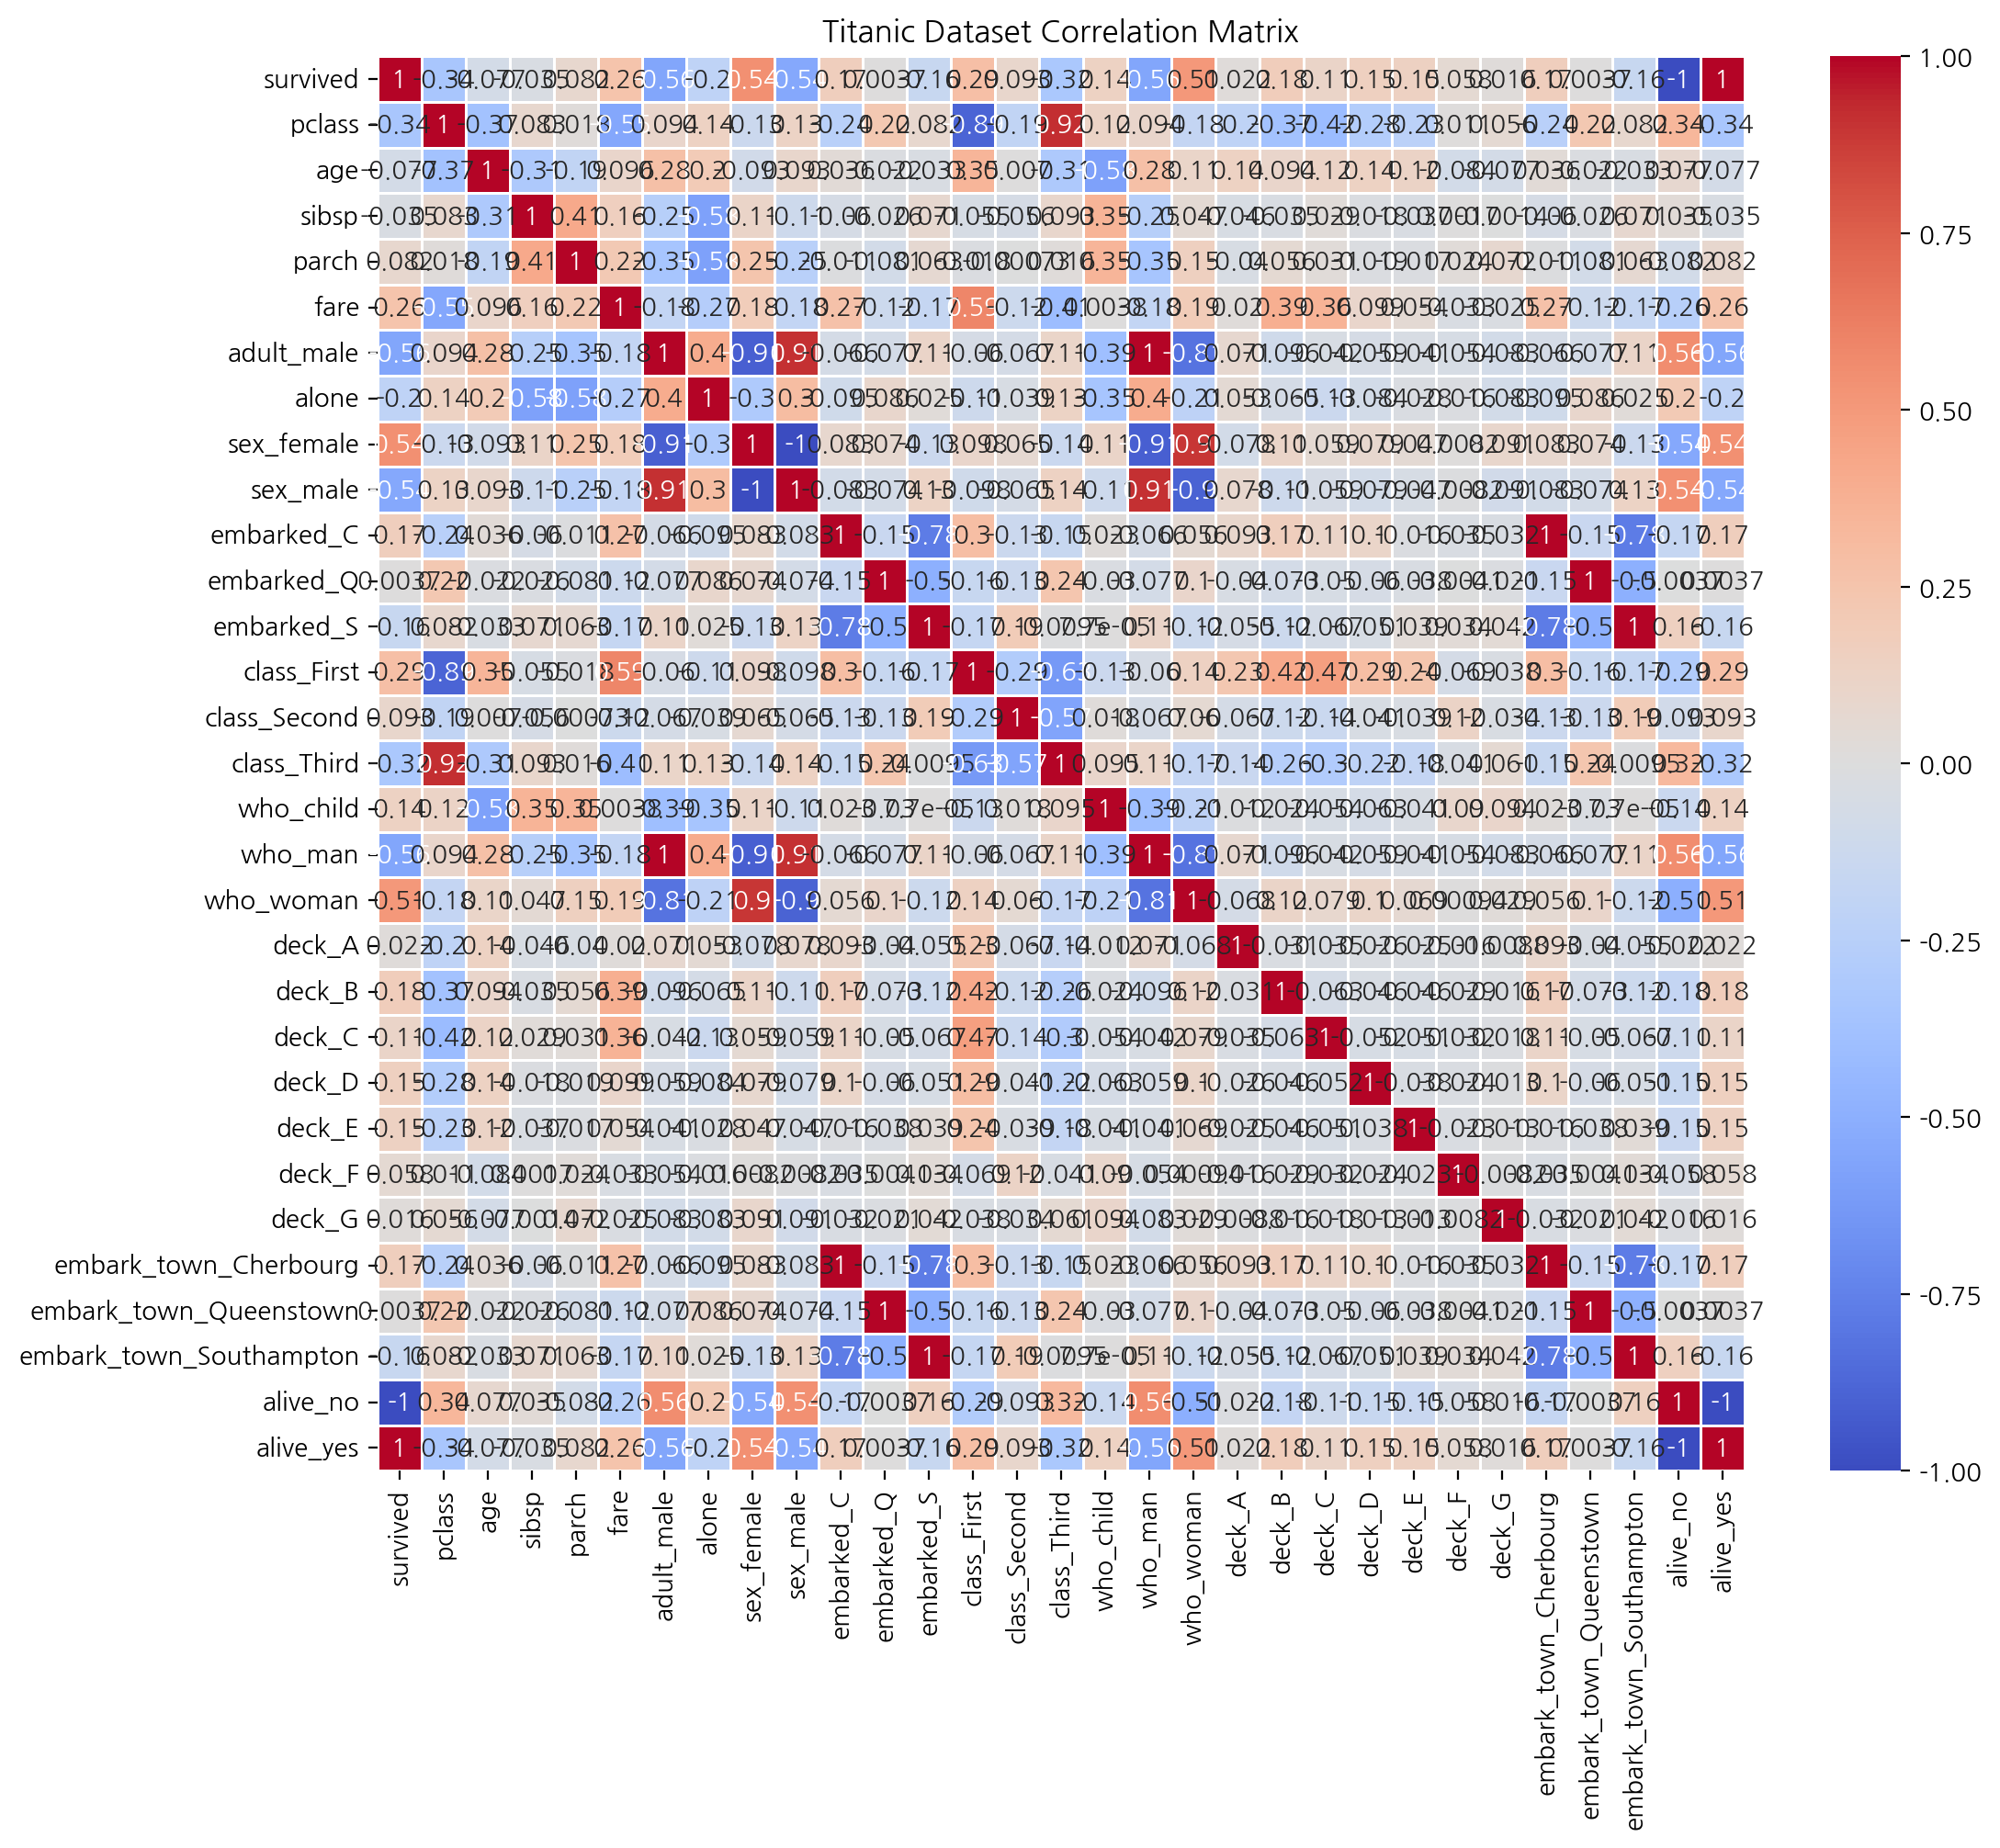

In [14]:
correlation_matrix = titanic_numeric.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Titanic Dataset Correlation Matrix')
plt.show()

# 성별

In [15]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [16]:
titanic.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [17]:
titanic[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

sex  survived
0  female  0.742038
1    male  0.188908

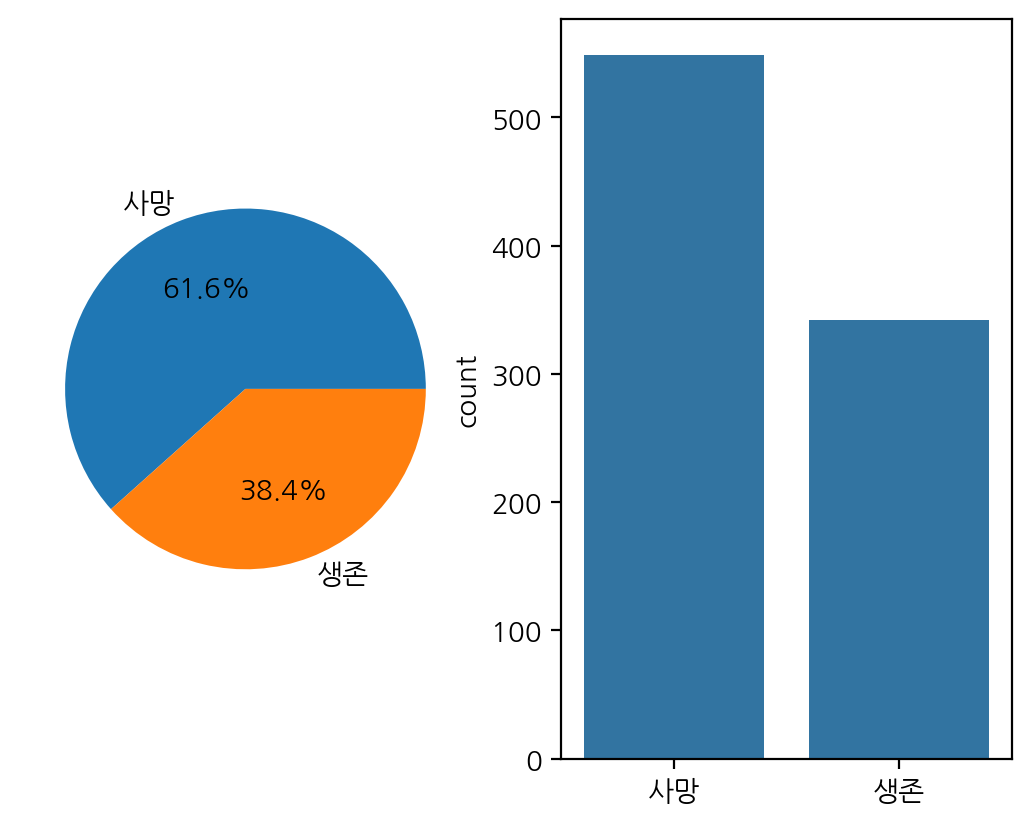

In [18]:
fig, ax = plt.subplots(1, 2)
labels = ['사망', '생존']


titanic['survived'].value_counts().plot.pie(ax=ax[0],  autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='')


sns.countplot(data=titanic, x='survived', ax=ax[1])
ax[1].set(xlabel='', xticklabels=labels)

plt.show()

In [19]:
titanic.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

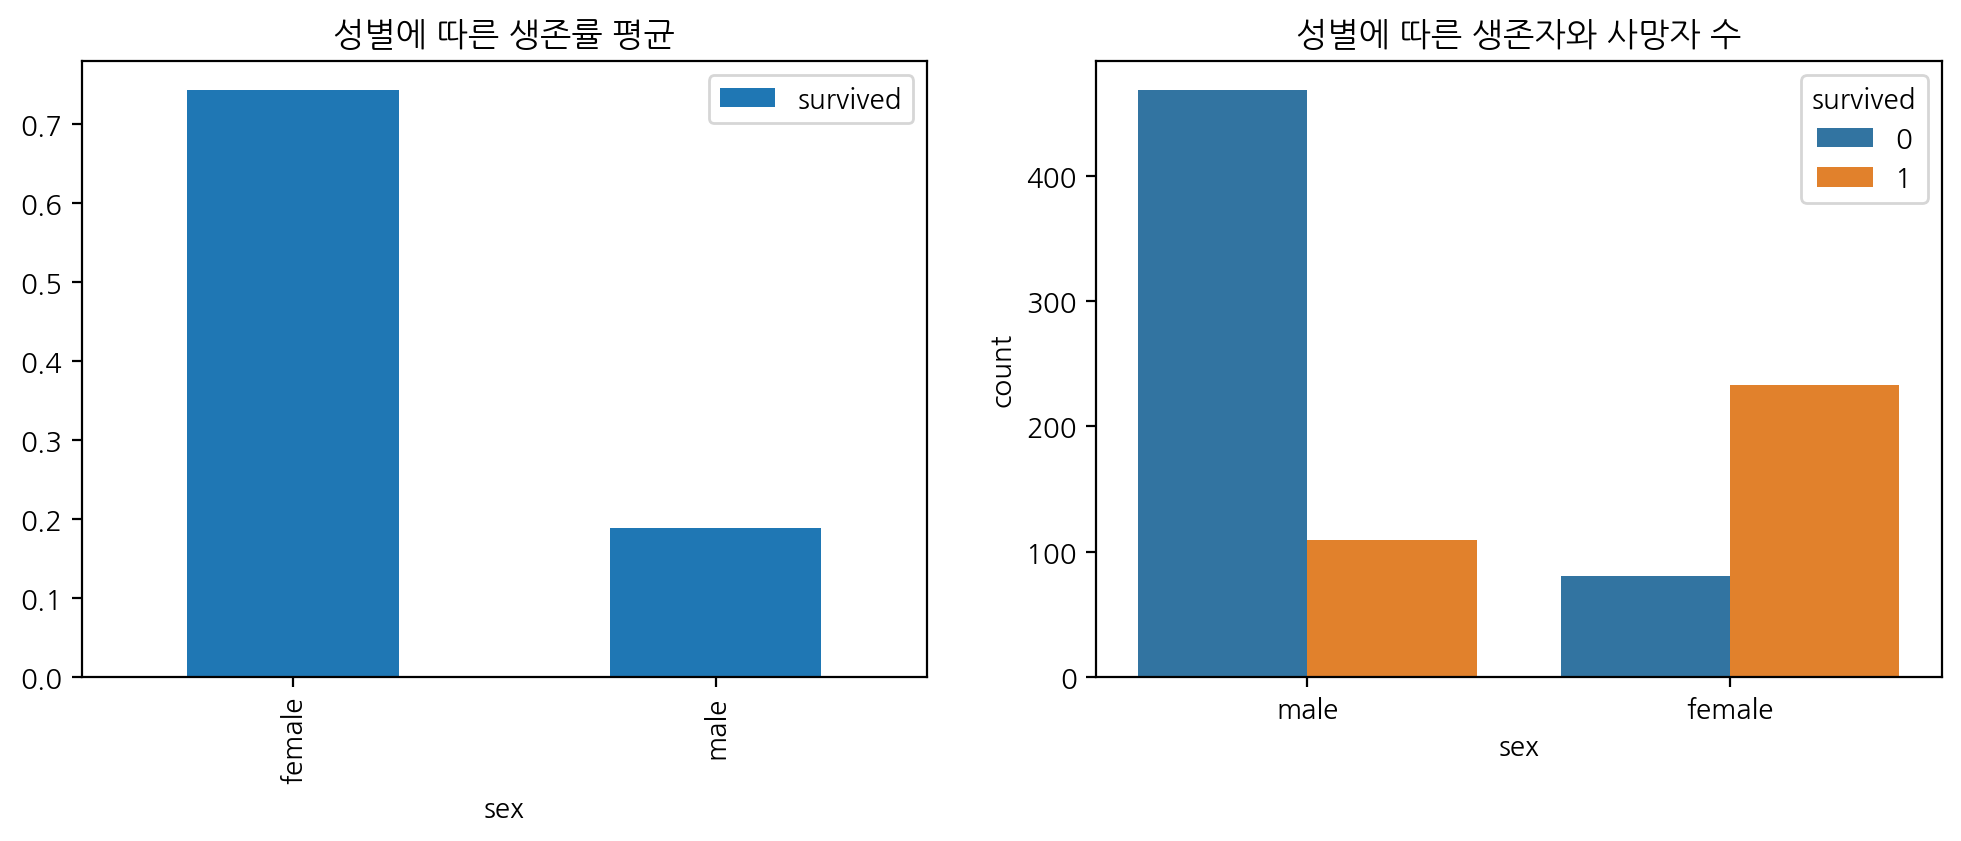

In [25]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))

#성별에 따른 생존률 평균
titanic[['sex', 'survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('성별에 따른 생존률 평균')

#성별에 따른 생존자와 사망자 수
sns.countplot(x='sex', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('성별에 따른 생존자와 사망자 수')



plt.show()

#결과: 여성의 생존율은 약 74.2%, 남자의 생존율은 18.8%, 여성의 생존율이 더 높다.
#또한 탑승객은 남성이 여성에 비해 훨씬 많지만 생존율은 낮다.


In [28]:
from scipy.stats import chi2_contingency

# 성별과 생존 여부 간의 관련성을 확인하기 위한 카이 제곱 검정
contingency_table = pd.crosstab(titanic['sex'], titanic['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("p-value:", p)

Chi-square value: 260.71702016732104
p-value: 1.1973570627755645e-58


카이 제곱 값이 약 260.72이고 유의확률이 거의 0에 수렴하는 매우 작은 값이다. 이는 성별과 생존 여부 간에 매우 강력한 관련이 있음을 나타남

## -등급

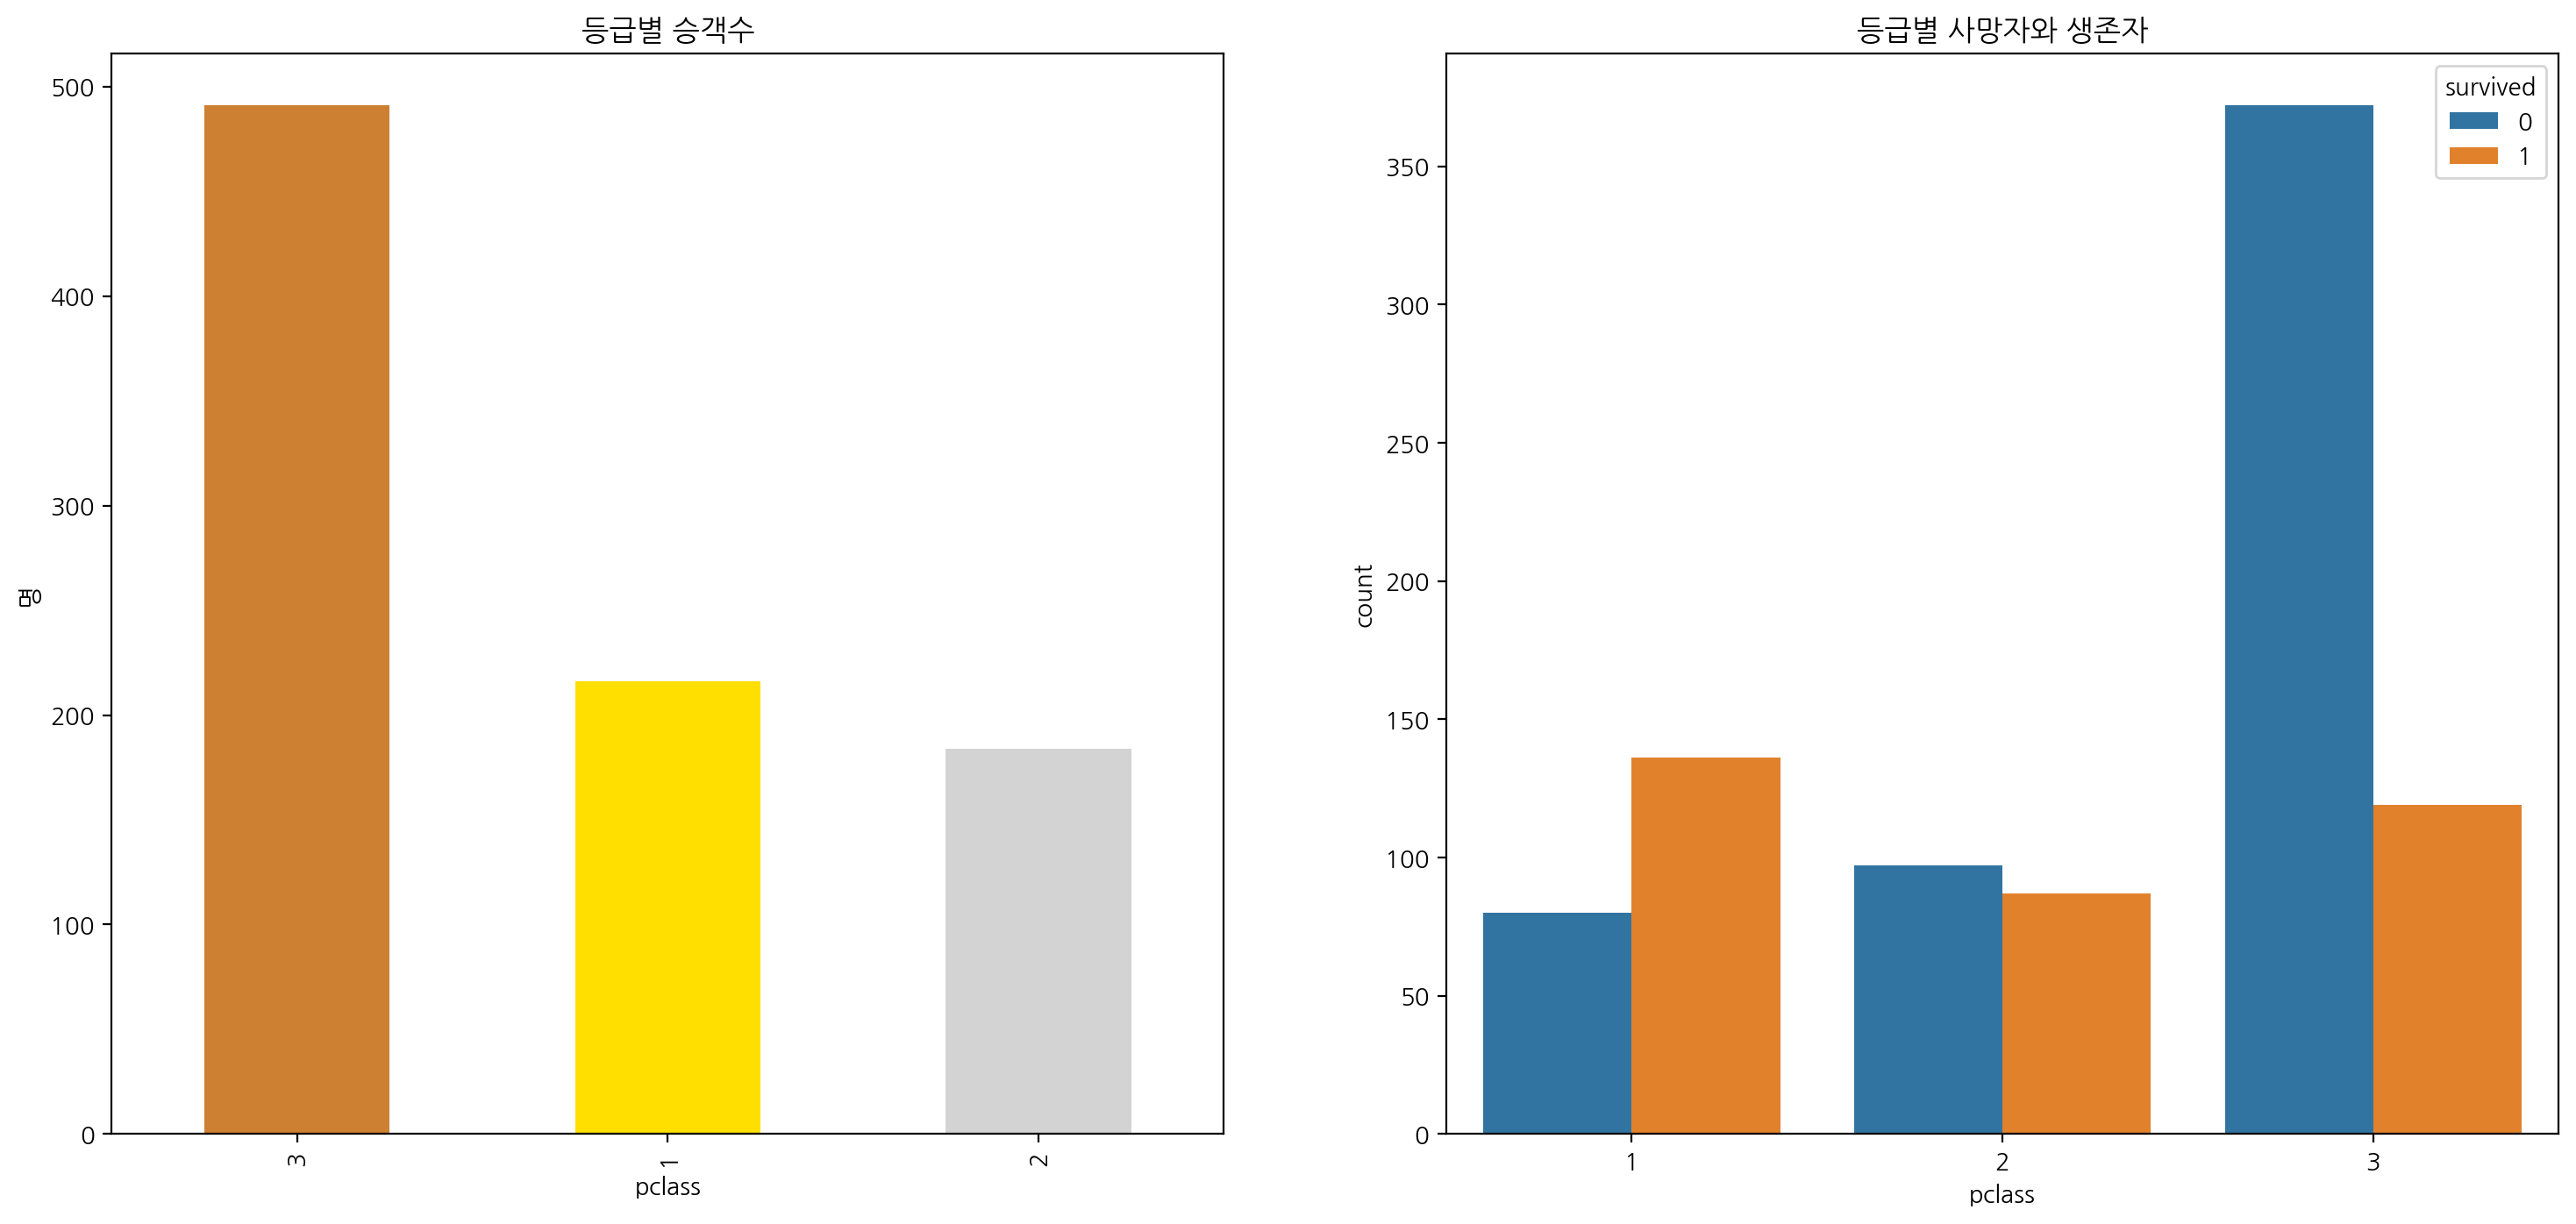

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic['pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('등급별 승객수')
ax[0].set_ylabel('명')
sns.countplot(x='pclass',hue='survived',data=titanic,ax=ax[1])
ax[1].set_title('등급별 사망자와 생존자')
plt.show()

# 3등급 객실에 들어간 승객수가 가장 많았고 그만큼 사망자도 많았다.

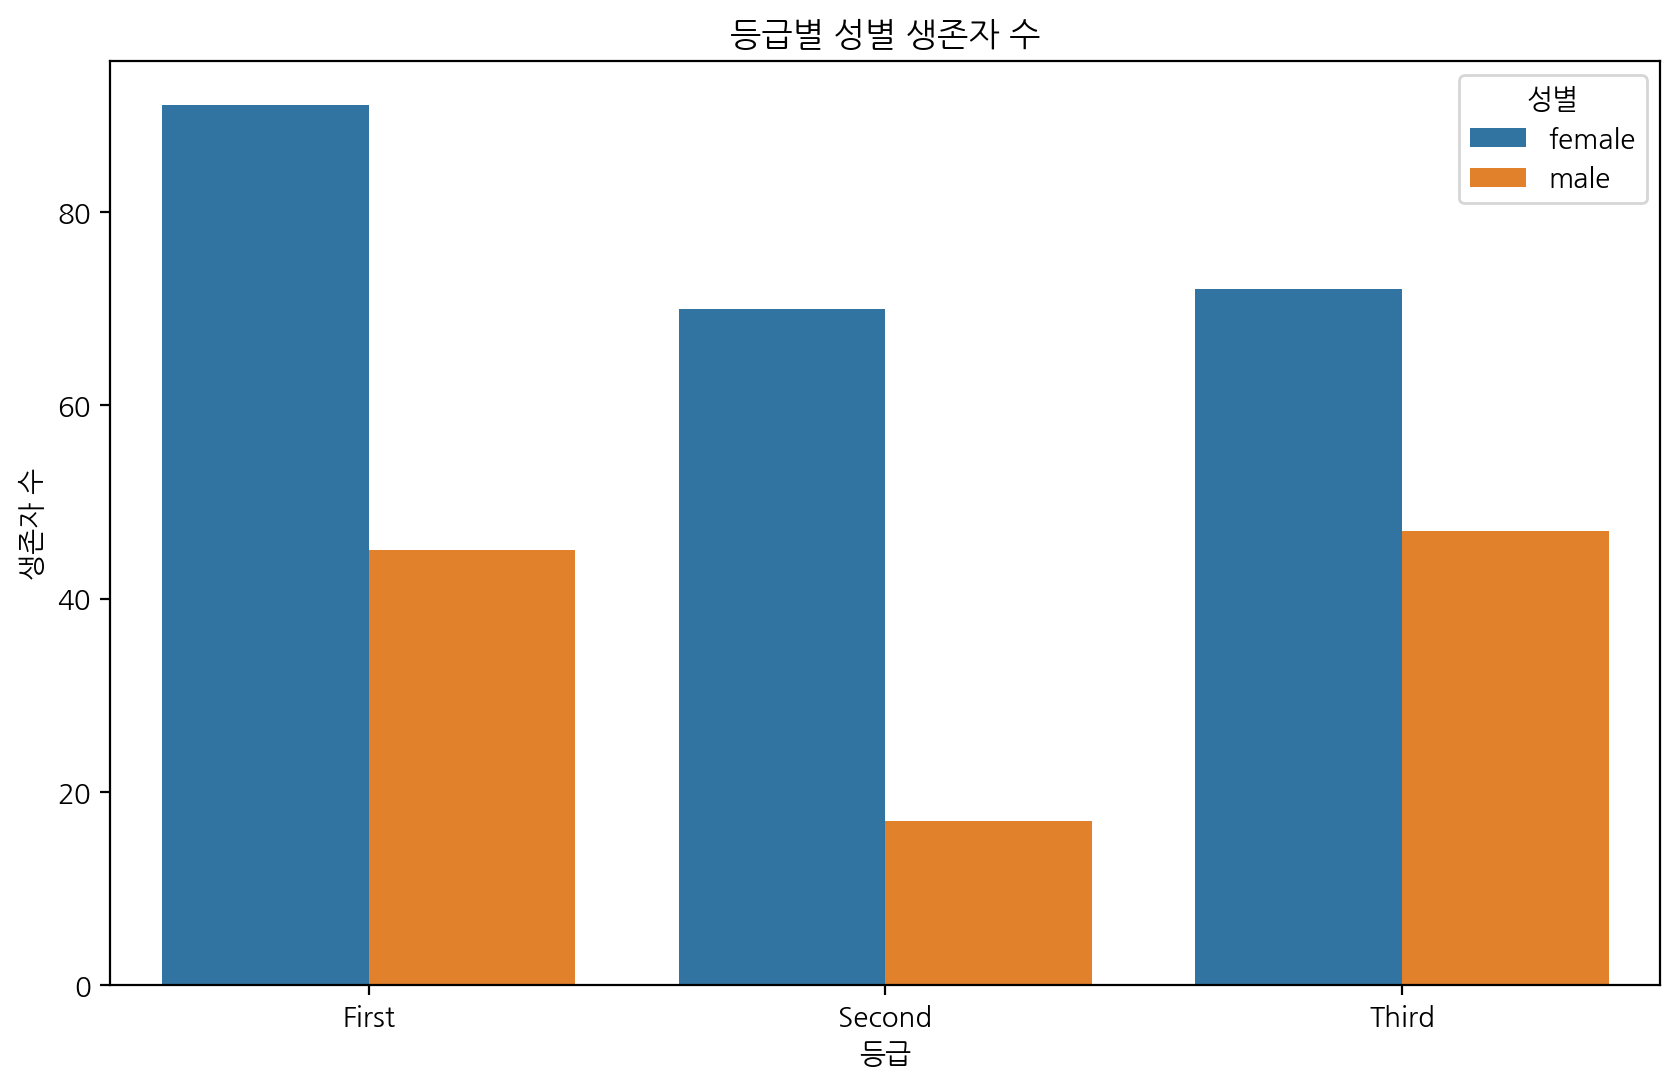

In [30]:
# 등급별, 성별로 데이터 그룹화
grouped_data = titanic.groupby(['class', 'sex'])['survived'].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='class', y='survived', hue='sex')
plt.title('등급별 성별 생존자 수')
plt.xlabel('등급')
plt.ylabel('생존자 수')
plt.legend(title='성별')
plt.show()

# 1등급 객실에는 비교적 생존율이 높은 여성도 많았고 그렇다고 해서 남성의 비율이 적지 않았다

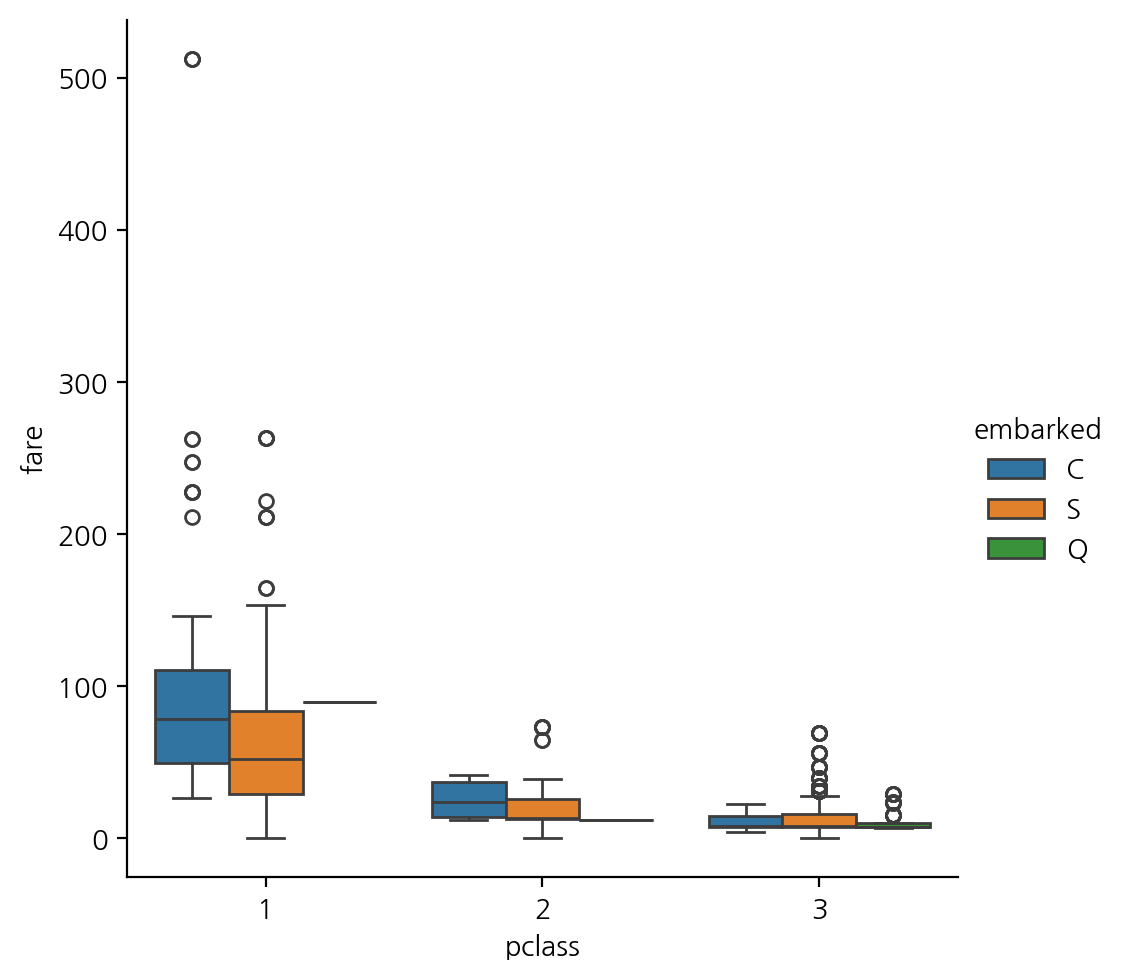

In [38]:
# 등급별 요금과 항구 데이터 추출
data = titanic[['pclass', 'fare', 'embarked']]

# 데이터 분석 및 시각화
sns.catplot(data=data, x='pclass', y='fare', hue='embarked', kind='box')


In [ ]:
# c에 승선한 승객은 비율은 적지만 높은 티켓을 구매
# s에서 많이 승선, 하지만 1등급 구매 비율은 낮음
# q에는 제일 적게 승선, 주로 낮은 티켓 구매

In [37]:
titanic.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

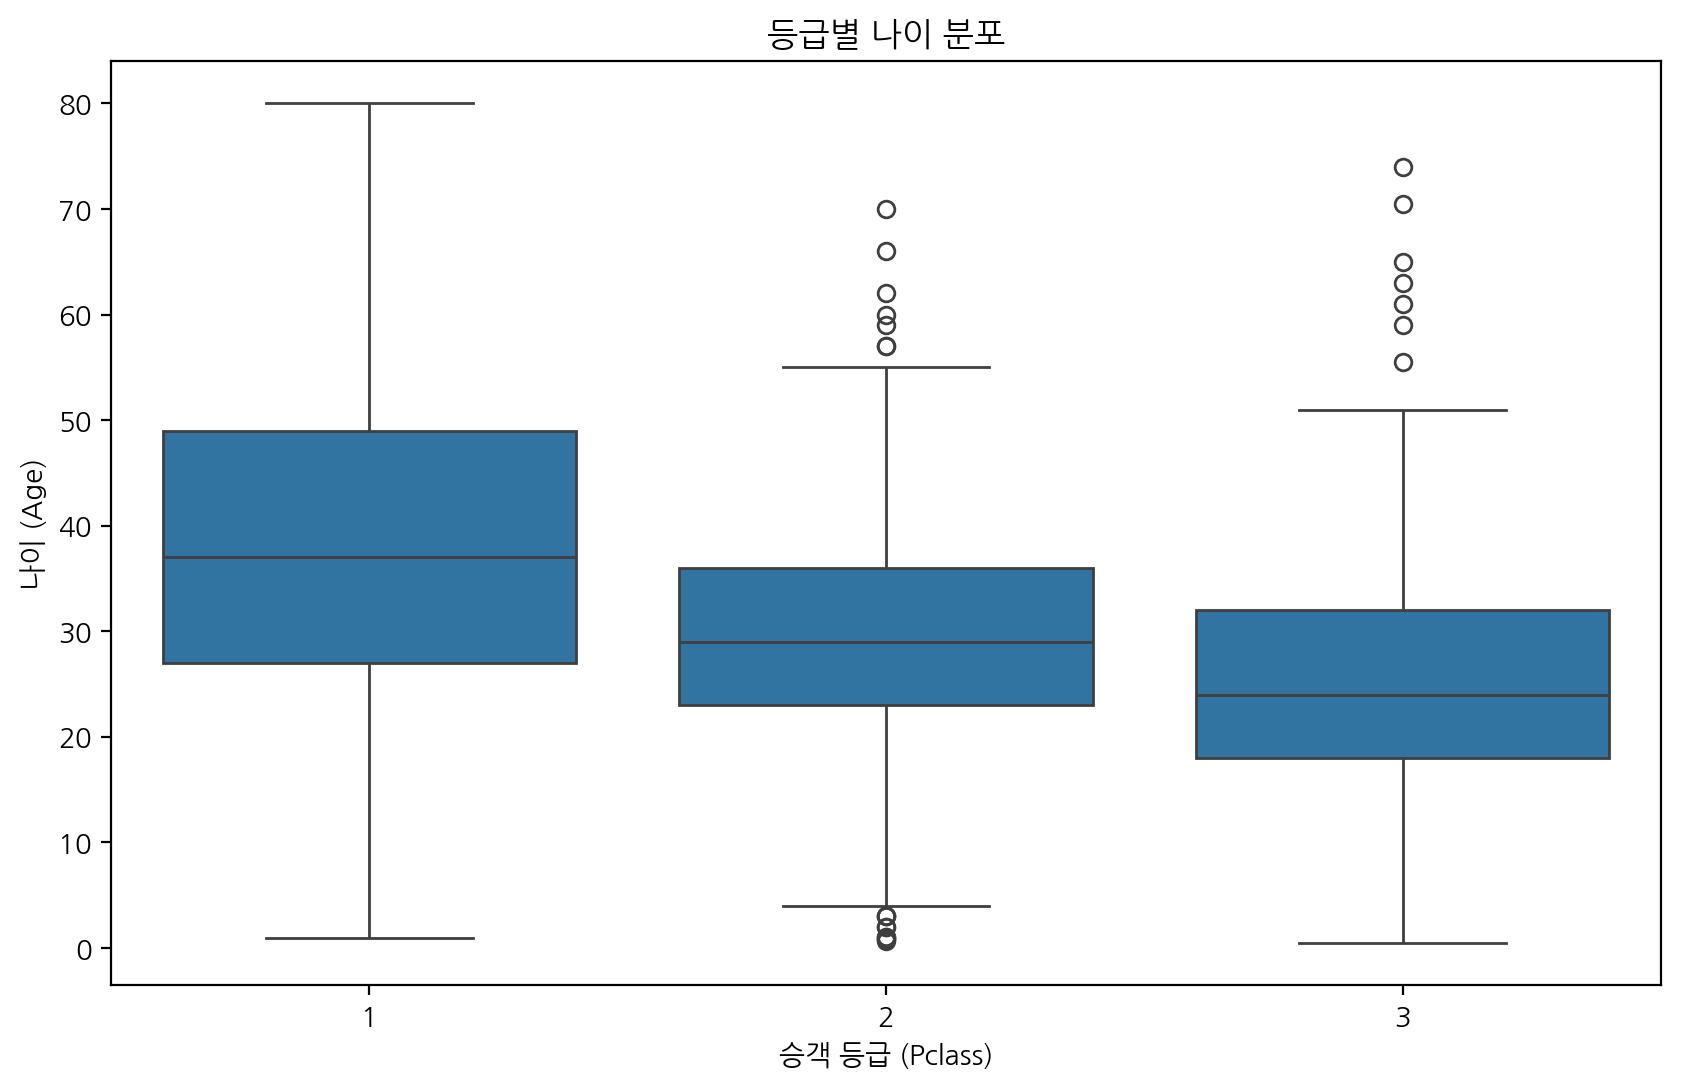

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', data=titanic)
plt.title('등급별 나이 분포')
plt.xlabel('승객 등급 (Pclass)')
plt.ylabel('나이 (Age)')
plt.show()

나이(범주화)-등급

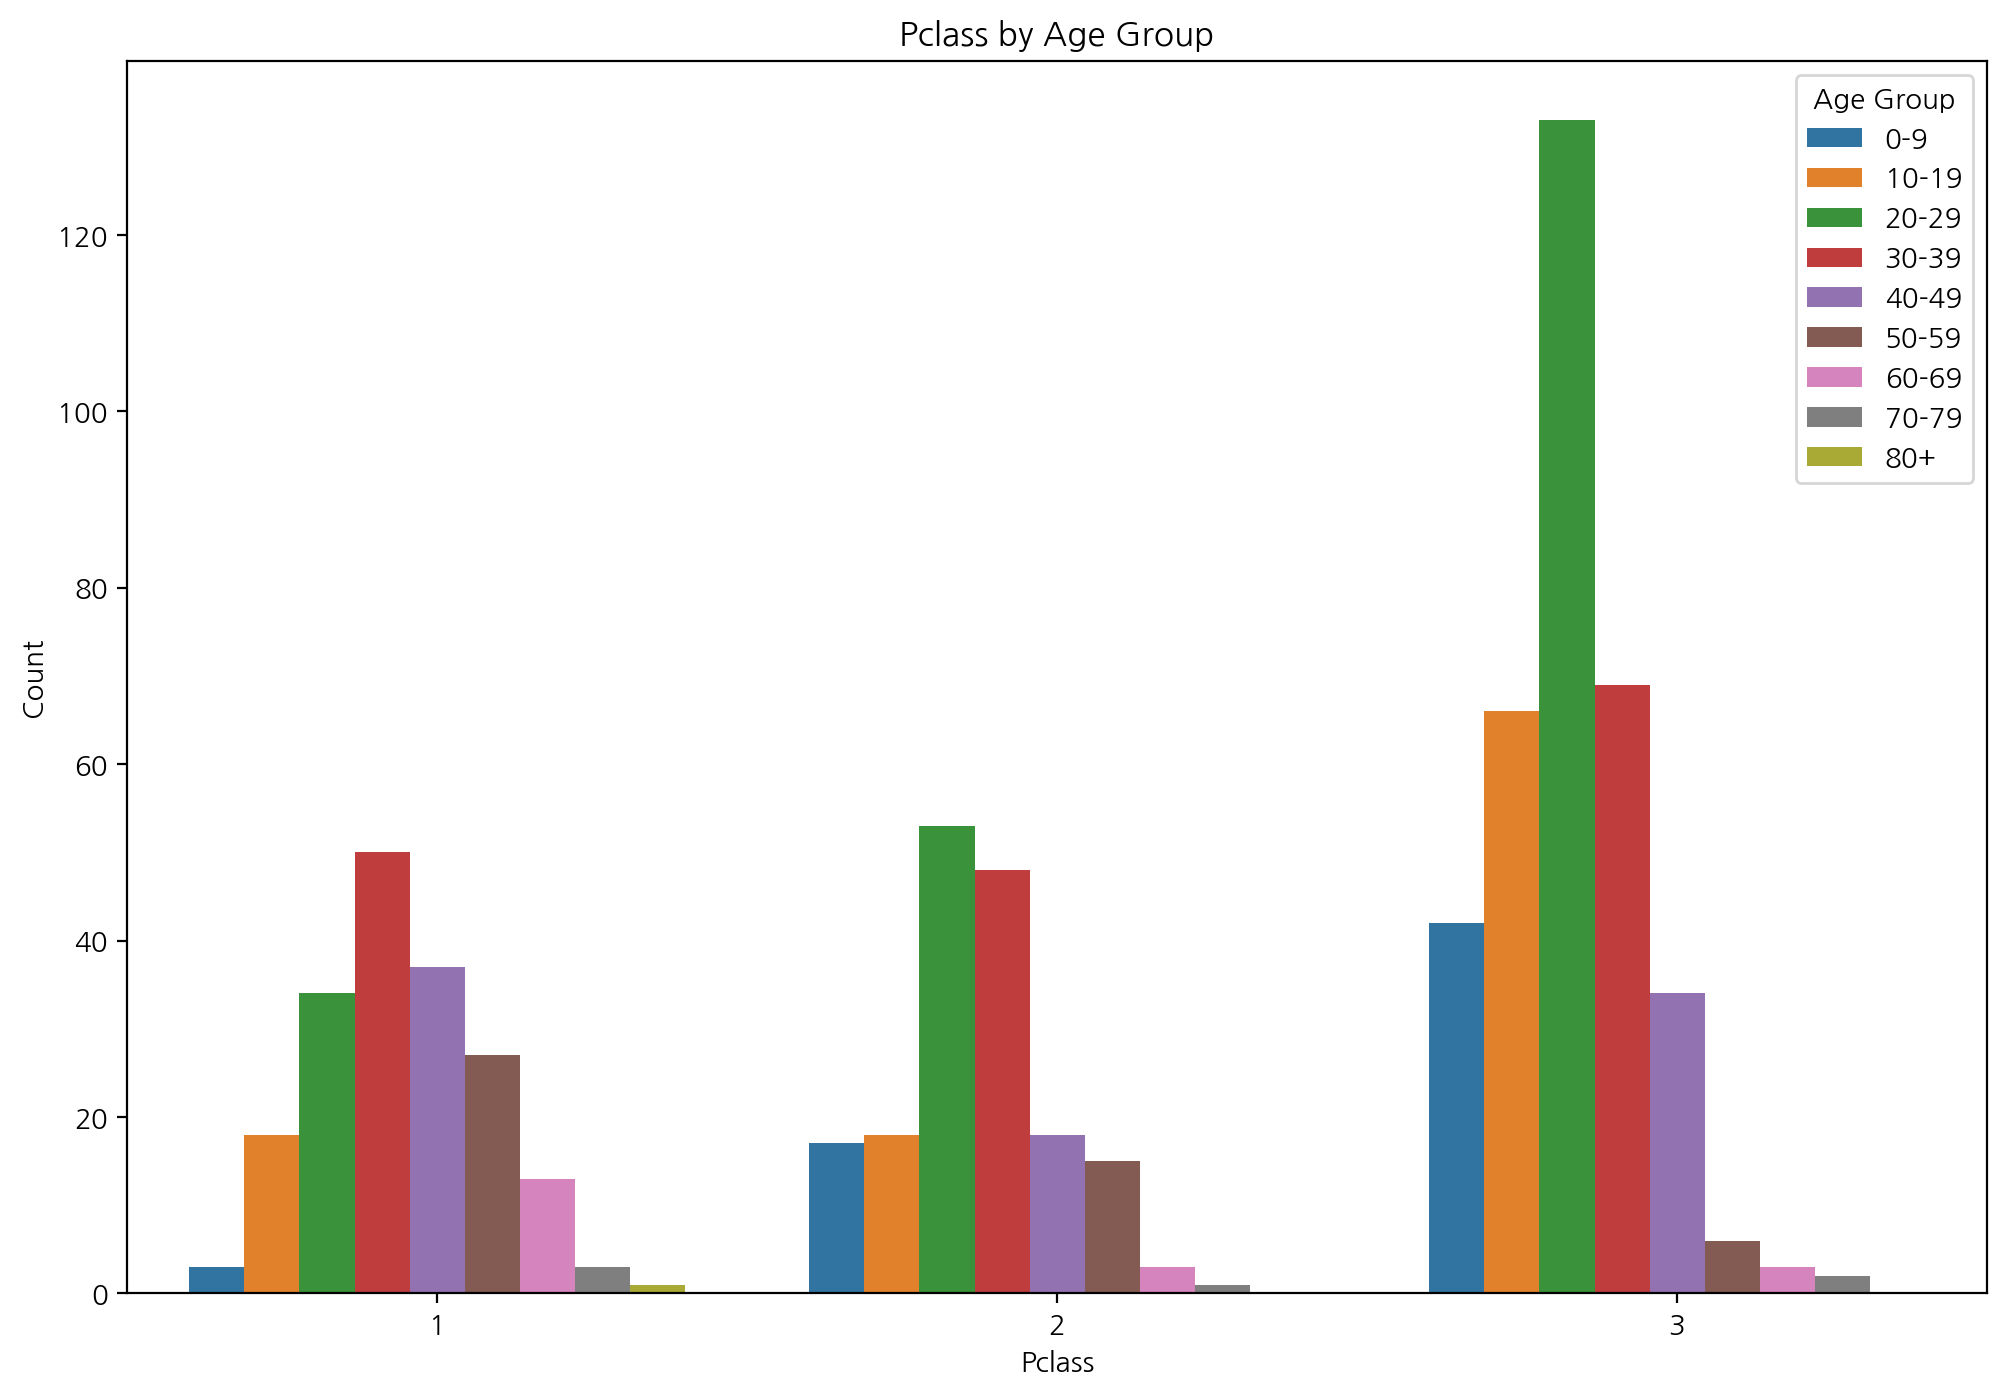

In [43]:
# 나이를 범주화하고 정렬된 순서로 범주화
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# assign을 사용하여 AgeGroup 열 추가
df = df.assign(AgeGroup=pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False))

# 나이 범주별 등급과 성별 비율 계산
age_group_pclass_sex = df.groupby(['AgeGroup', 'pclass', 'sex']).size().unstack(fill_value=0)


# 시각화
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='pclass', hue='AgeGroup', order=[1, 2, 3], hue_order=age_labels)
plt.title('Pclass by Age Group')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()


In [ ]:
#20-29세 승객: 모든 등급에서 가장 많은 비중 차지, 특히 3등급

#10-19세 승객: 1등급과 3등급에서 두 번째로 많은 비중 차지

#고령 승객 (70-79세 및 80+): 모든 등급에서 거의 보이지 않는다.

#어린이 승객 (0-9세): 3등급에서 상대적으로 많은편, 전체적으로는 적은 비중을 차지

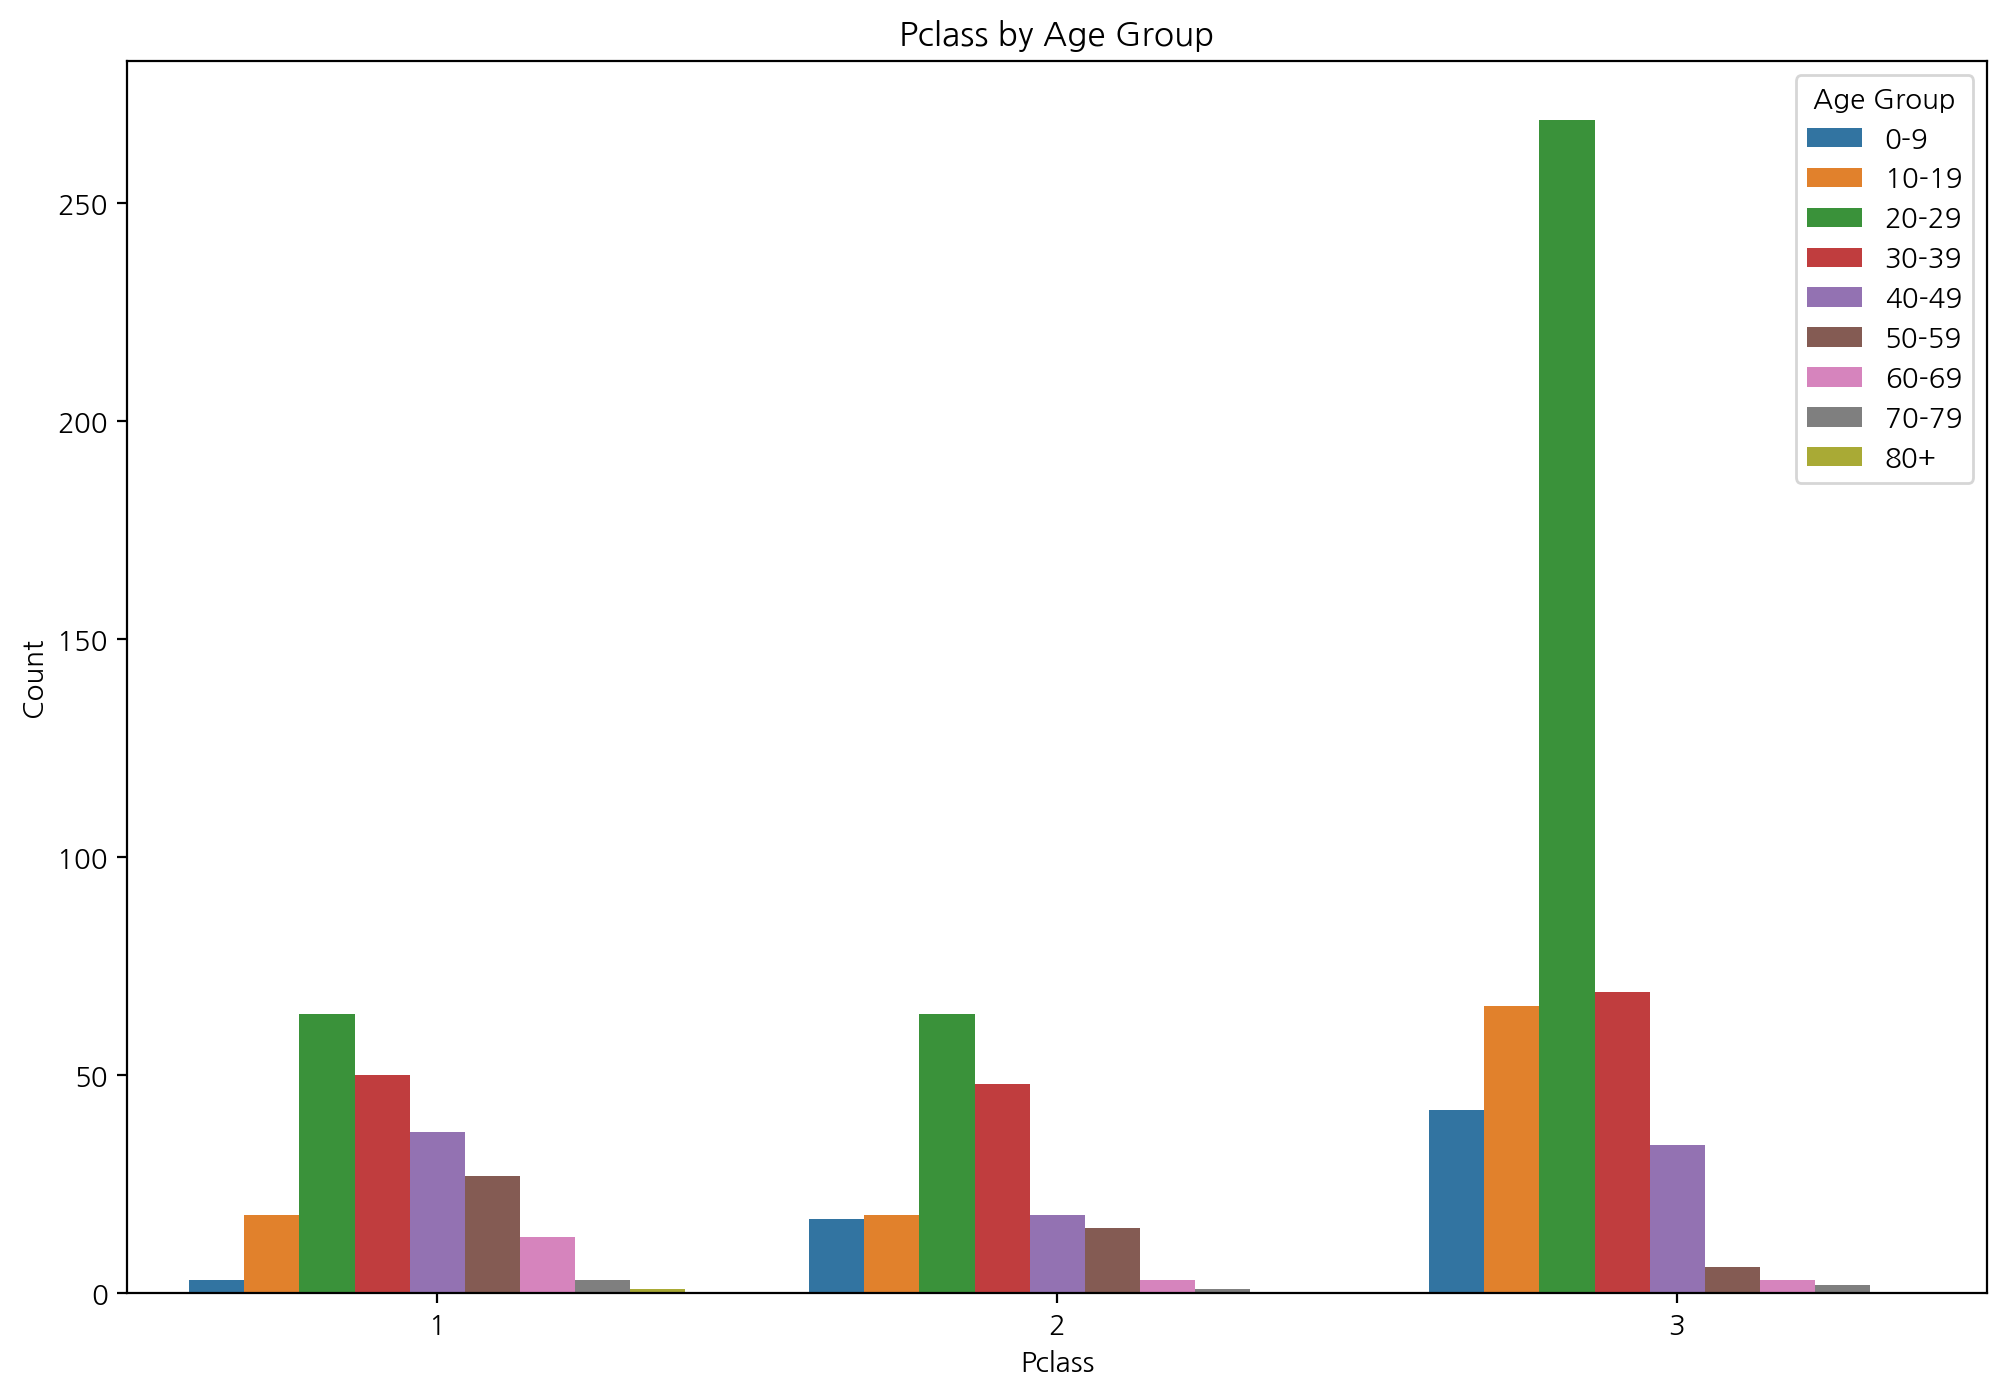

<Figure size 1200x800 with 0 Axes>

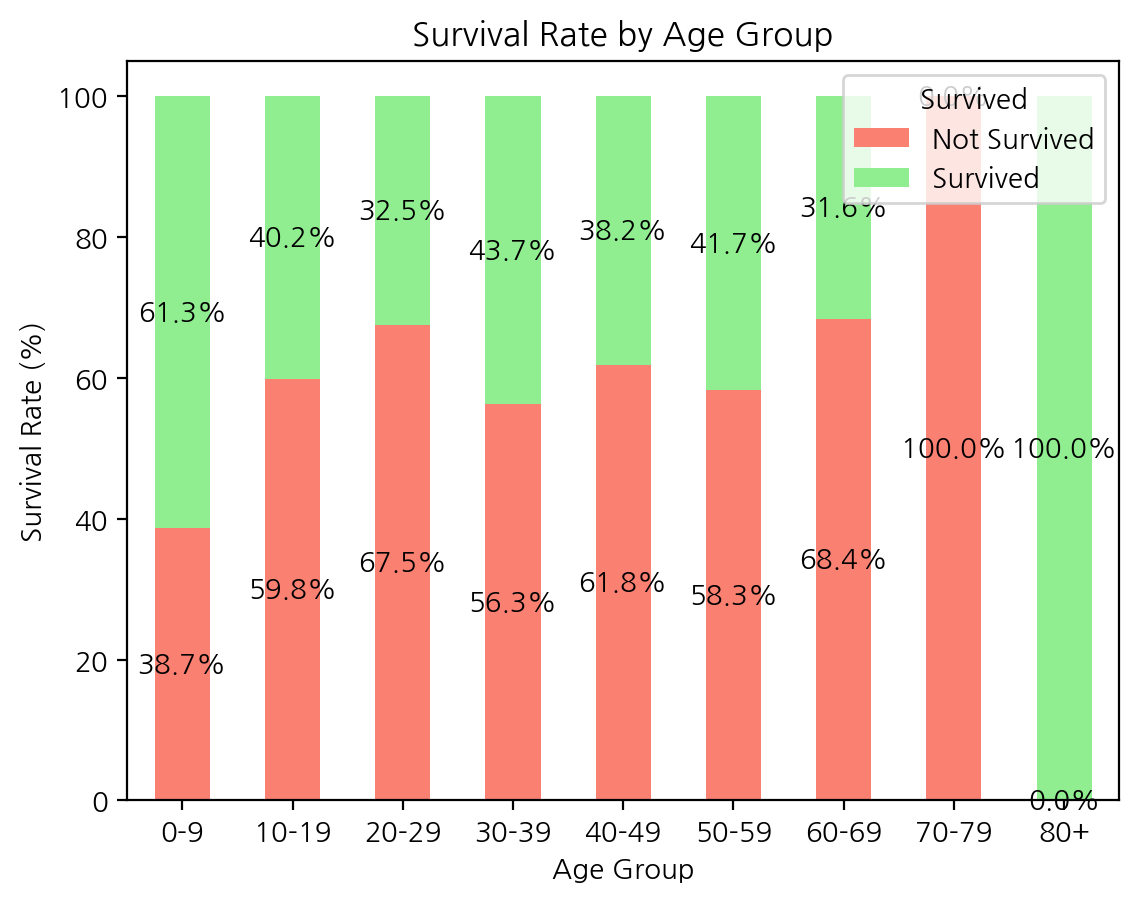

In [62]:
df = sns.load_dataset('titanic')

# 결측값 처리 (age 컬럼의 결측값을 나이의 중위수로 채움)
df['age'].fillna(df['age'].median(), inplace=True)

# 나이를 범주화하고 정렬된 순서로 범주화
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# assign을 사용하여 AgeGroup 열 추가
df = df.assign(AgeGroup=pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False))

# 나이 범주별 등급과 성별 비율 계산
age_group_pclass_sex = df.groupby(['AgeGroup', 'pclass', 'sex']).size().unstack(fill_value=0)

# 시각화: 나이 범주와 등급, 성별 비율
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='pclass', hue='AgeGroup', order=[1, 2, 3], hue_order=age_labels)
plt.title('Pclass by Age Group')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

# 나이 범주와 생존 여부 비교
age_group_survived = df.groupby(['AgeGroup', 'survived']).size().unstack(fill_value=0)

# 생존율 계산
age_group_survived_percent = age_group_survived.div(age_group_survived.sum(axis=1), axis=0) * 100

# 시각화: 나이 범주별 생존율
plt.figure(figsize=(12, 8))
age_group_survived_percent.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'])
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=0)
for i in range(age_group_survived_percent.shape[0]):
    for j in range(age_group_survived_percent.shape[1]):
        plt.text(i, age_group_survived_percent.iloc[i, j]/2 + age_group_survived_percent.iloc[:, :j].sum(axis=1).iloc[i],
                 f'{age_group_survived_percent.iloc[i, j]:.1f}%', ha='center', va='center', color='black')
plt.show()

In [ ]:
#나이가 어리거나 중년층인 경우 생존율이 높고, 나이가 많거나 청소년인 경우 생존율이 낮다

<Figure size 1400x1000 with 0 Axes>

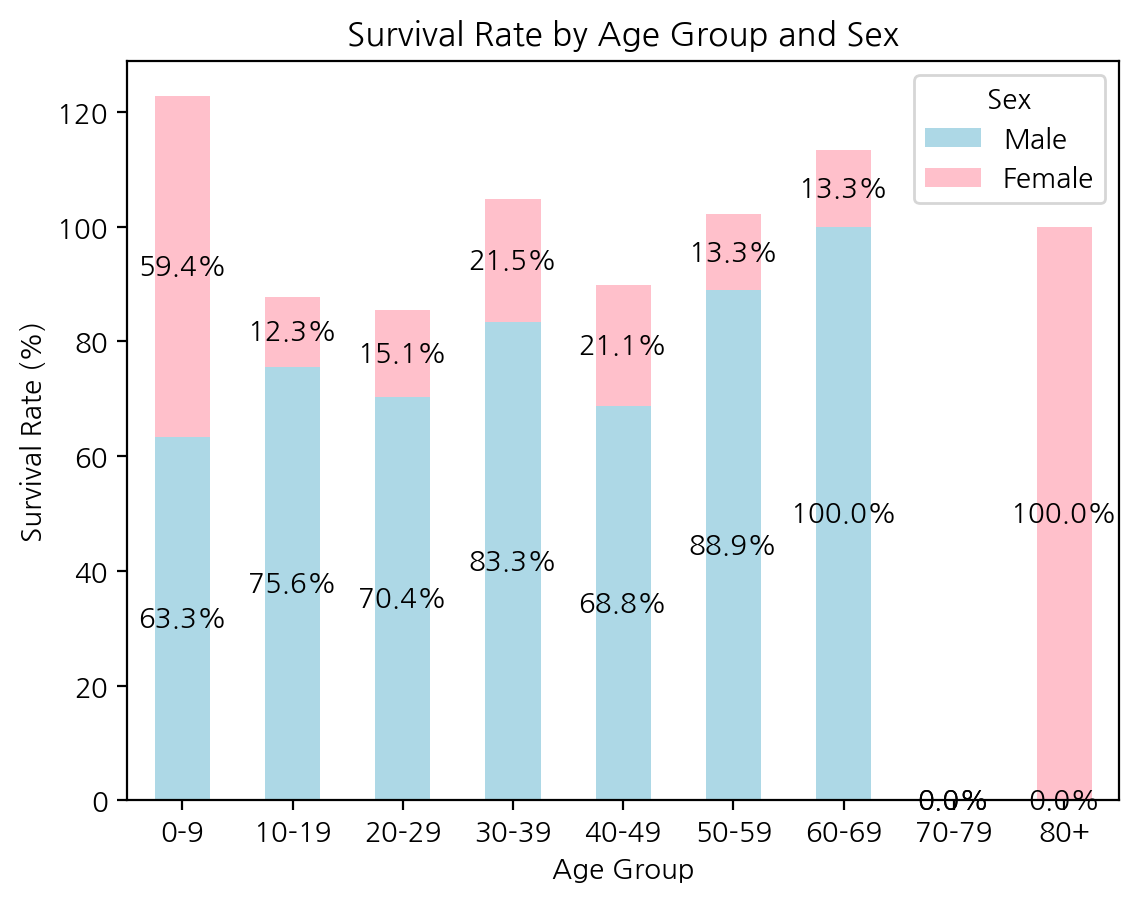

In [70]:
# 결측값 처리 (age 컬럼의 결측값을 나이의 중위수로 채움)
df['age'].fillna(df['age'].median(), inplace=True)

# 나이를 범주화하고 정렬된 순서로 범주화
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# assign을 사용하여 AgeGroup 열 추가
df = df.assign(AgeGroup=pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False))

# 나이 범주와 성별에 따른 생존율 계산
age_group_sex_survived = df.groupby(['AgeGroup', 'sex', 'survived']).size().unstack(fill_value=0)

# 생존율 계산
age_group_sex_survived_percent = age_group_sex_survived.div(age_group_sex_survived.sum(axis=1), axis=0) * 100

# 성별에 따른 나이 범주별 생존율을 피벗 테이블로 변환
age_group_sex_survived_pivot = age_group_sex_survived_percent.reset_index().pivot(index='AgeGroup', columns='sex', values=1).fillna(0)

# 성별에 따른 나이 범주별 생존율 시각화
plt.figure(figsize=(14, 10))
age_group_sex_survived_pivot.plot(kind='bar', stacked=True, color=['lightblue', 'pink'])
plt.title('Survival Rate by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.xticks(rotation=0)
for i in range(age_group_sex_survived_pivot.shape[0]):
    for j in range(age_group_sex_survived_pivot.shape[1]):
        if pd.notna(age_group_sex_survived_pivot.iloc[i, j]):
            plt.text(i, age_group_sex_survived_pivot.iloc[i, j]/2 + age_group_sex_survived_pivot.iloc[:, :j].sum(axis=1).iloc[i],
                     f"{age_group_sex_survived_pivot.iloc[i, j]:.1f}%", ha='center', va='center', color='black')
plt.show()


In [ ]:
#모든 연령대에서 여성의 생존율이 남성보다 높다 = 구조 과정에서 여성과 어린이가 우선시됨.

#청소년(10-19세)과 젊은 성인(20-29세) 남성의 생존율이 특히 낮음 = 구조 과정에서 성인 남성이 우선순위에서 밀렸다.

#70세 이상 그룹의 생존율이 매우 낮은 것은 나이 많은 승객들이 구조 우선순위에서 밀렸을 가능성(존재,하지만 나이가 많음에 따른 사망도 충분히 가능성 있음)

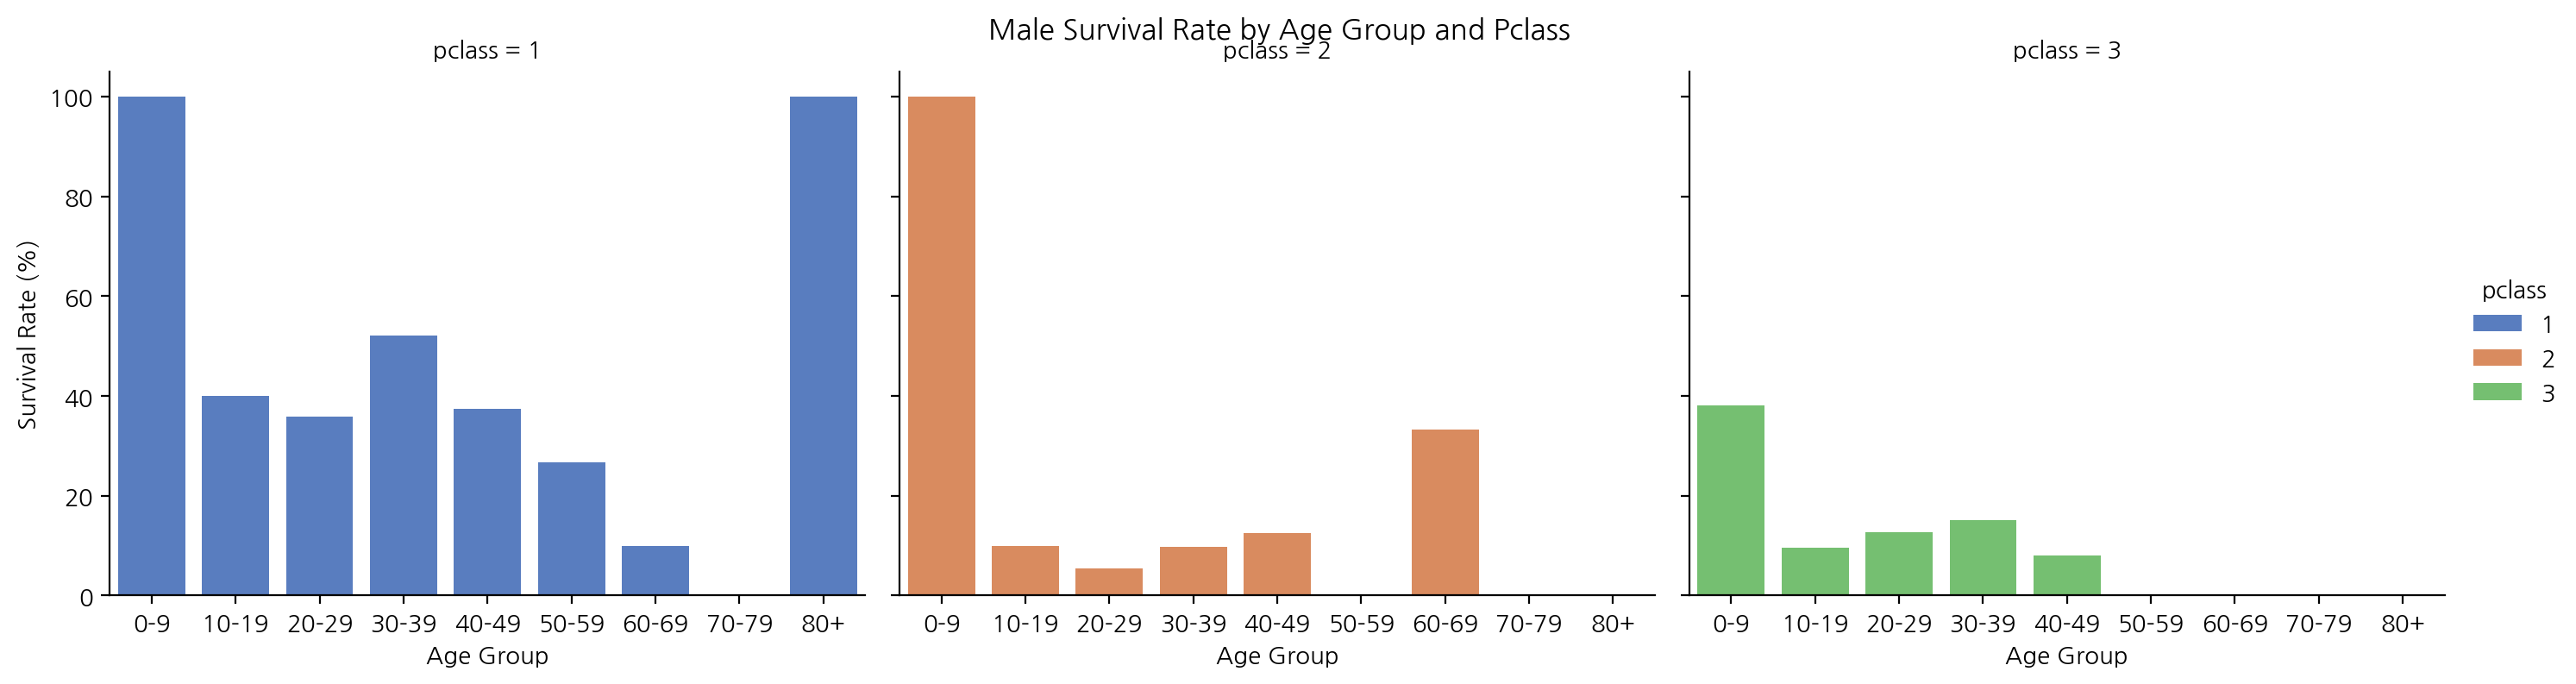

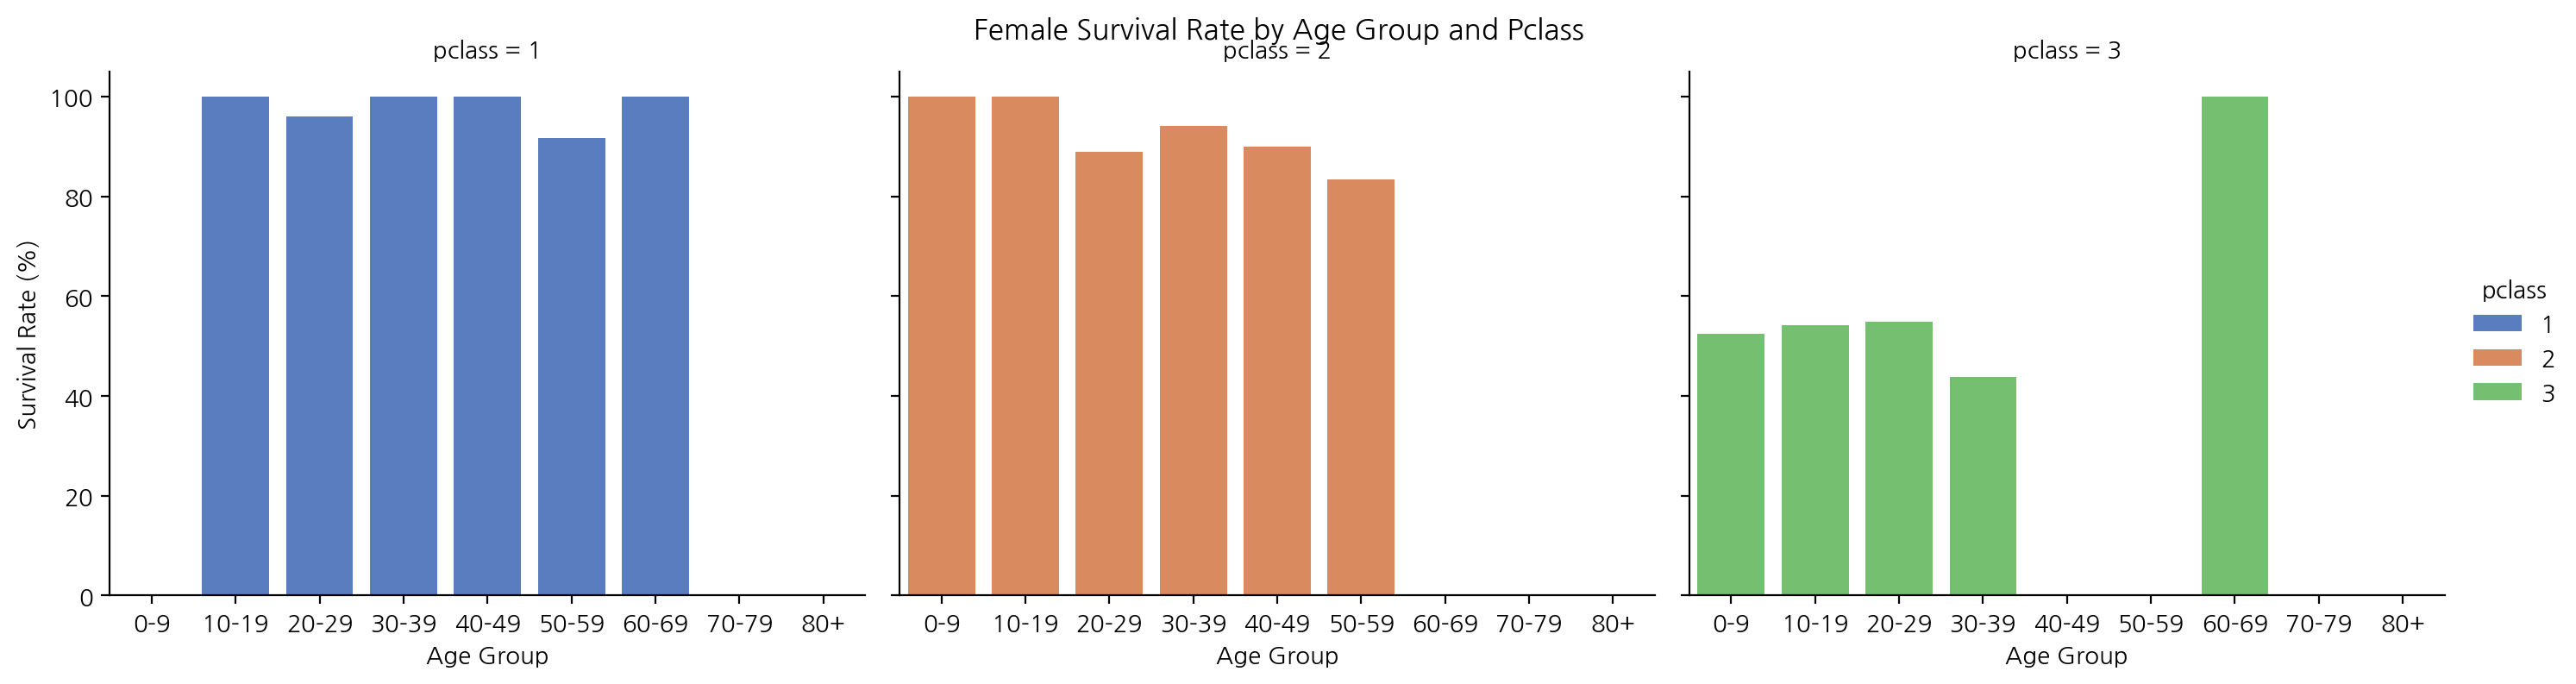

In [75]:
df = sns.load_dataset('titanic')

# 결측값 처리 (age 컬럼의 결측값을 나이의 중위수로 채움)
df['age'].fillna(df['age'].median(), inplace=True)

# 나이를 범주화하고 정렬된 순서로 범주화
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# assign을 사용하여 AgeGroup 열 추가
df = df.assign(AgeGroup=pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False))

# 나이 범주, 성별, 등급에 따른 생존율 계산
age_group_pclass_sex_survived = df.groupby(['AgeGroup', 'pclass', 'sex', 'survived']).size().unstack(fill_value=0)

# 생존율 계산
age_group_pclass_sex_survived_percent = age_group_pclass_sex_survived.div(age_group_pclass_sex_survived.sum(axis=1), axis=0) * 100

# 성별에 따른 나이 범주별 생존율을 피벗 테이블로 변환
age_group_pclass_sex_survived_pivot = age_group_pclass_sex_survived_percent.reset_index().pivot(index=['AgeGroup', 'pclass'], columns='sex', values=1).fillna(0)

# 시각화
g = sns.catplot(
    data=age_group_pclass_sex_survived_pivot.reset_index(),
    x='AgeGroup', y='male', hue='pclass',
    kind='bar', col='pclass',
    height=4, aspect=1.2,
    palette='muted'
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Male Survival Rate by Age Group and Pclass')
g.set_axis_labels('Age Group', 'Survival Rate (%)')

g = sns.catplot(
    data=age_group_pclass_sex_survived_pivot.reset_index(),
    x='AgeGroup', y='female', hue='pclass',
    kind='bar', col='pclass',
    height=4, aspect=1.2,
    palette='muted'
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Female Survival Rate by Age Group and Pclass')
g.set_axis_labels('Age Group', 'Survival Rate (%)')

plt.show()

In [ ]:
등급에 따른 생존율:

1등급 여성의 생존율이 모든 연령대에서 매우 높습니다. 이는 1등급 여성 승객이 구조 우선순위에서 매우 유리했음을 나타냅니다.
2등급 여성의 생존율도 대부분의 연령대에서 매우 높습니다. 특히 60-69세 여성의 생존율이 100%입니다.
3등급 여성의 생존율은 1등급 및 2등급보다 낮지만, 특정 연령대에서는 여전히 높습니다.
나이와 성별에 따른 생존율:

어린이 (0-9세)의 생존율이 높습니다. 특히 2등급 남성과 3등급 남성에서 두드러집니다. 이는 구조 과정에서 어린이가 우선시되었음을 시사합니다.
청소년 및 젊은 성인 남성 (10-29세)의 생존율이 매우 낮습니다. 이는 이 연령대의 남성들이 구조 우선순위에서 밀렸을 가능성을 나타냅니다.
중년층 남성 (30-49세)의 생존율은 일부 등급에서 약간 높지만, 여전히 낮은 편입니다.
노년층 (70세 이상) 남성의 생존율은 특이하게도 1등급에서 매우 높습니다. 이는 데이터의 특이성일 수 있습니다.
성별에 따른 생존율 차이:

전반적으로 여성의 생존율이 남성보다 높습니다. 이는 구조 과정에서 여성과 어린이가 우선시되었음을 나타냅니다.
특히 1등급과 2등급 여성 승객의 생존율이 매우 높습니다.

가족여부-등석-생존여부

등급별 가족 동반 여부:

가족 동반 여부에 따른 생존율:
survived             0          1
pclass 가족동반                      
1      0     46.788991  53.211009
       1     27.102804  72.897196
2      0     65.384615  34.615385
       1     36.250000  63.750000
3      0     78.703704  21.296296
       1     70.059880  29.940120


<Figure size 1200x800 with 0 Axes>

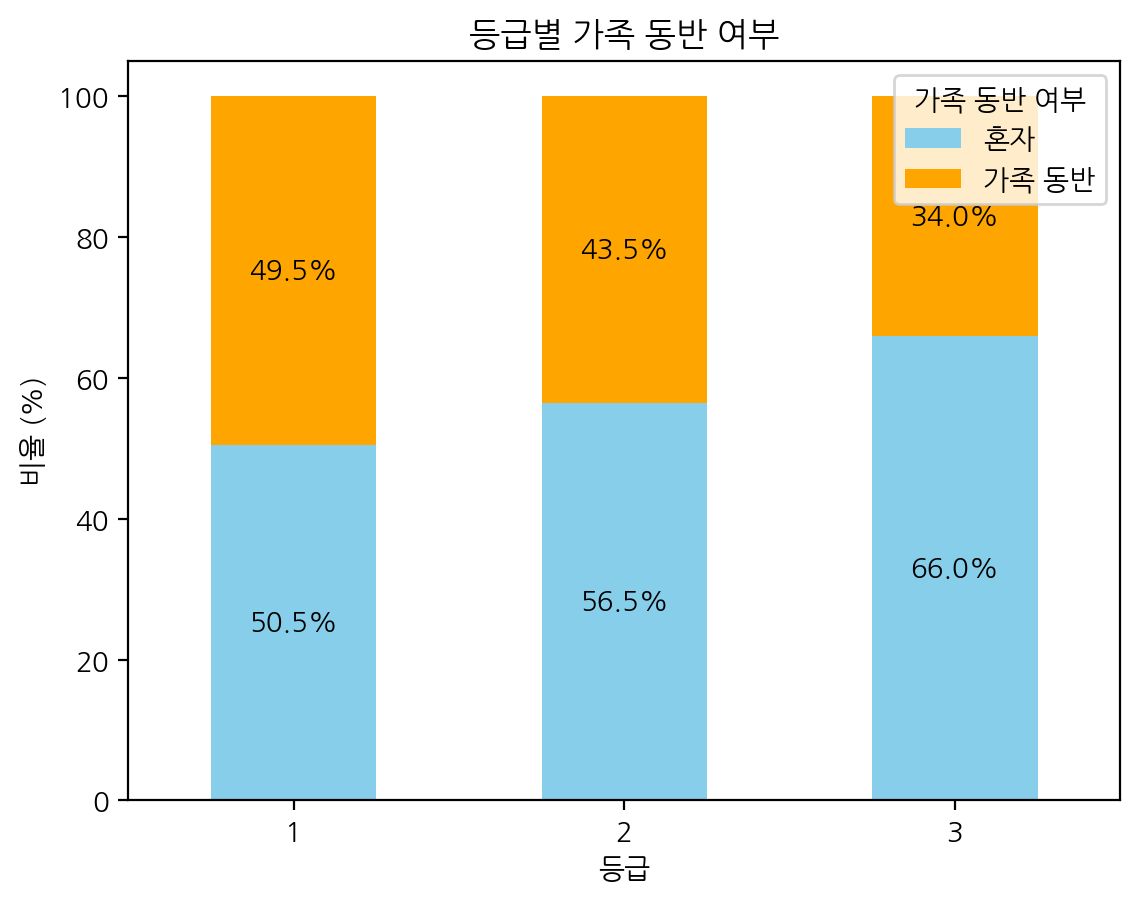

<Figure size 1200x800 with 0 Axes>

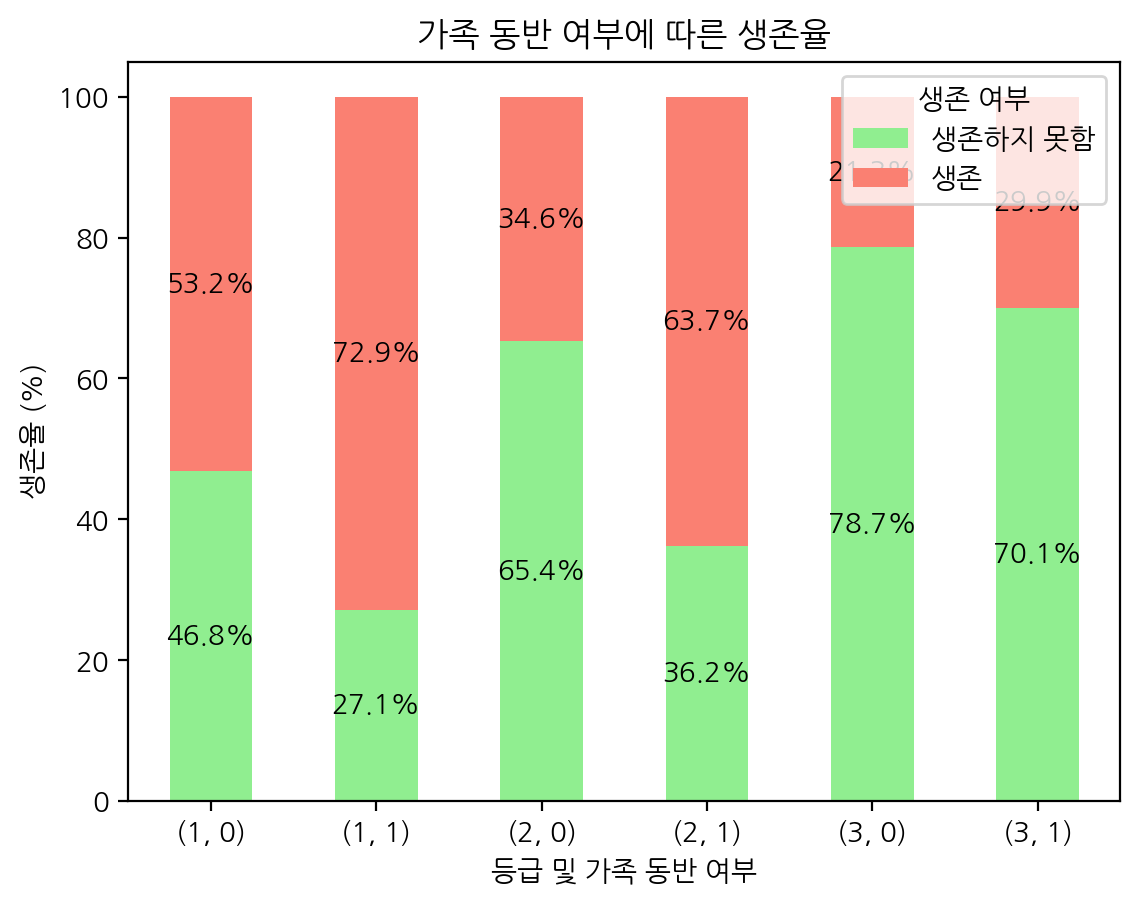

In [54]:
# Seaborn 내장 타이타닉 데이터셋 로드
df = sns.load_dataset('titanic')

# assign을 사용하여 가족 동반 여부 열 추가 및 이를 이진 변수로 변환
df = df.assign(
    가족동반=lambda x: x['sibsp'] + x['parch']
).assign(
    가족동반=lambda x: np.where(x['가족동반'] > 0, 1, 0)
)

# 등급별 가족 동반 비율 계산
family_pclass = df.groupby(['pclass', '가족동반']).size().unstack(fill_value=0)
family_pclass_percent = family_pclass.div(family_pclass.sum(axis=1), axis=0) * 100

# 생존 여부에 따른 가족 동반 비율 계산
survival_family_pclass = df.groupby(['pclass', '가족동반', 'survived']).size().unstack(fill_value=0)
survival_family_pclass_percent = survival_family_pclass.div(survival_family_pclass.sum(axis=1), axis=0) * 100

# 데이터프레임 출력
print("등급별 가족 동반 여부:")
family_pclass_percent
print("\n가족 동반 여부에 따른 생존율:")
print(survival_family_pclass_percent)

# 시각화 (스택드 바 플롯 사용)
plt.figure(figsize=(12, 8))
family_pclass_percent.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('등급별 가족 동반 여부')
plt.xlabel('등급')
plt.ylabel('비율 (%)')
plt.legend(title='가족 동반 여부', labels=['혼자', '가족 동반'])
plt.xticks(rotation=0)
for i in range(family_pclass_percent.shape[0]):
    for j in range(family_pclass_percent.shape[1]):
        plt.text(i, family_pclass_percent.iloc[i, j]/2 + family_pclass_percent.iloc[:, :j].sum(axis=1).iloc[i],
                 f'{family_pclass_percent.iloc[i, j]:.1f}%', ha='center', va='center', color='black')
plt.show()

plt.figure(figsize=(12, 8))
survival_family_pclass_percent.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('가족 동반 여부에 따른 생존율')
plt.xlabel('등급 및 가족 동반 여부')
plt.ylabel('생존율 (%)')
plt.legend(title='생존 여부', labels=['생존하지 못함', '생존'])
plt.xticks(rotation=0)
for i in range(survival_family_pclass_percent.shape[0]):
    for j in range(survival_family_pclass_percent.shape[1]):
        plt.text(i, survival_family_pclass_percent.iloc[i, j]/2 + survival_family_pclass_percent.iloc[:, :j].sum(axis=1).iloc[i],
                 f'{survival_family_pclass_percent.iloc[i, j]:.1f}%', ha='center', va='center', color='black')
plt.show()



In [ ]:
#등급 및 가족 동반여부 = (등급, o/x)

In [ ]:
#1등급에서 가족 동반이 생존율을 높이는 주요 요소인 반면, 2등급과 3등급에서는 가족이 없는 편이 생존율에 더 긍정적 영향을 미침

가족여부-요금-등급

교차표:



카이제곱 통계량: 302.8506848442284
p-value: 7.88338569034437e-68
자유도: 1
기대 빈도:
[[267.5959596 176.4040404]
 [269.4040404 177.5959596]]


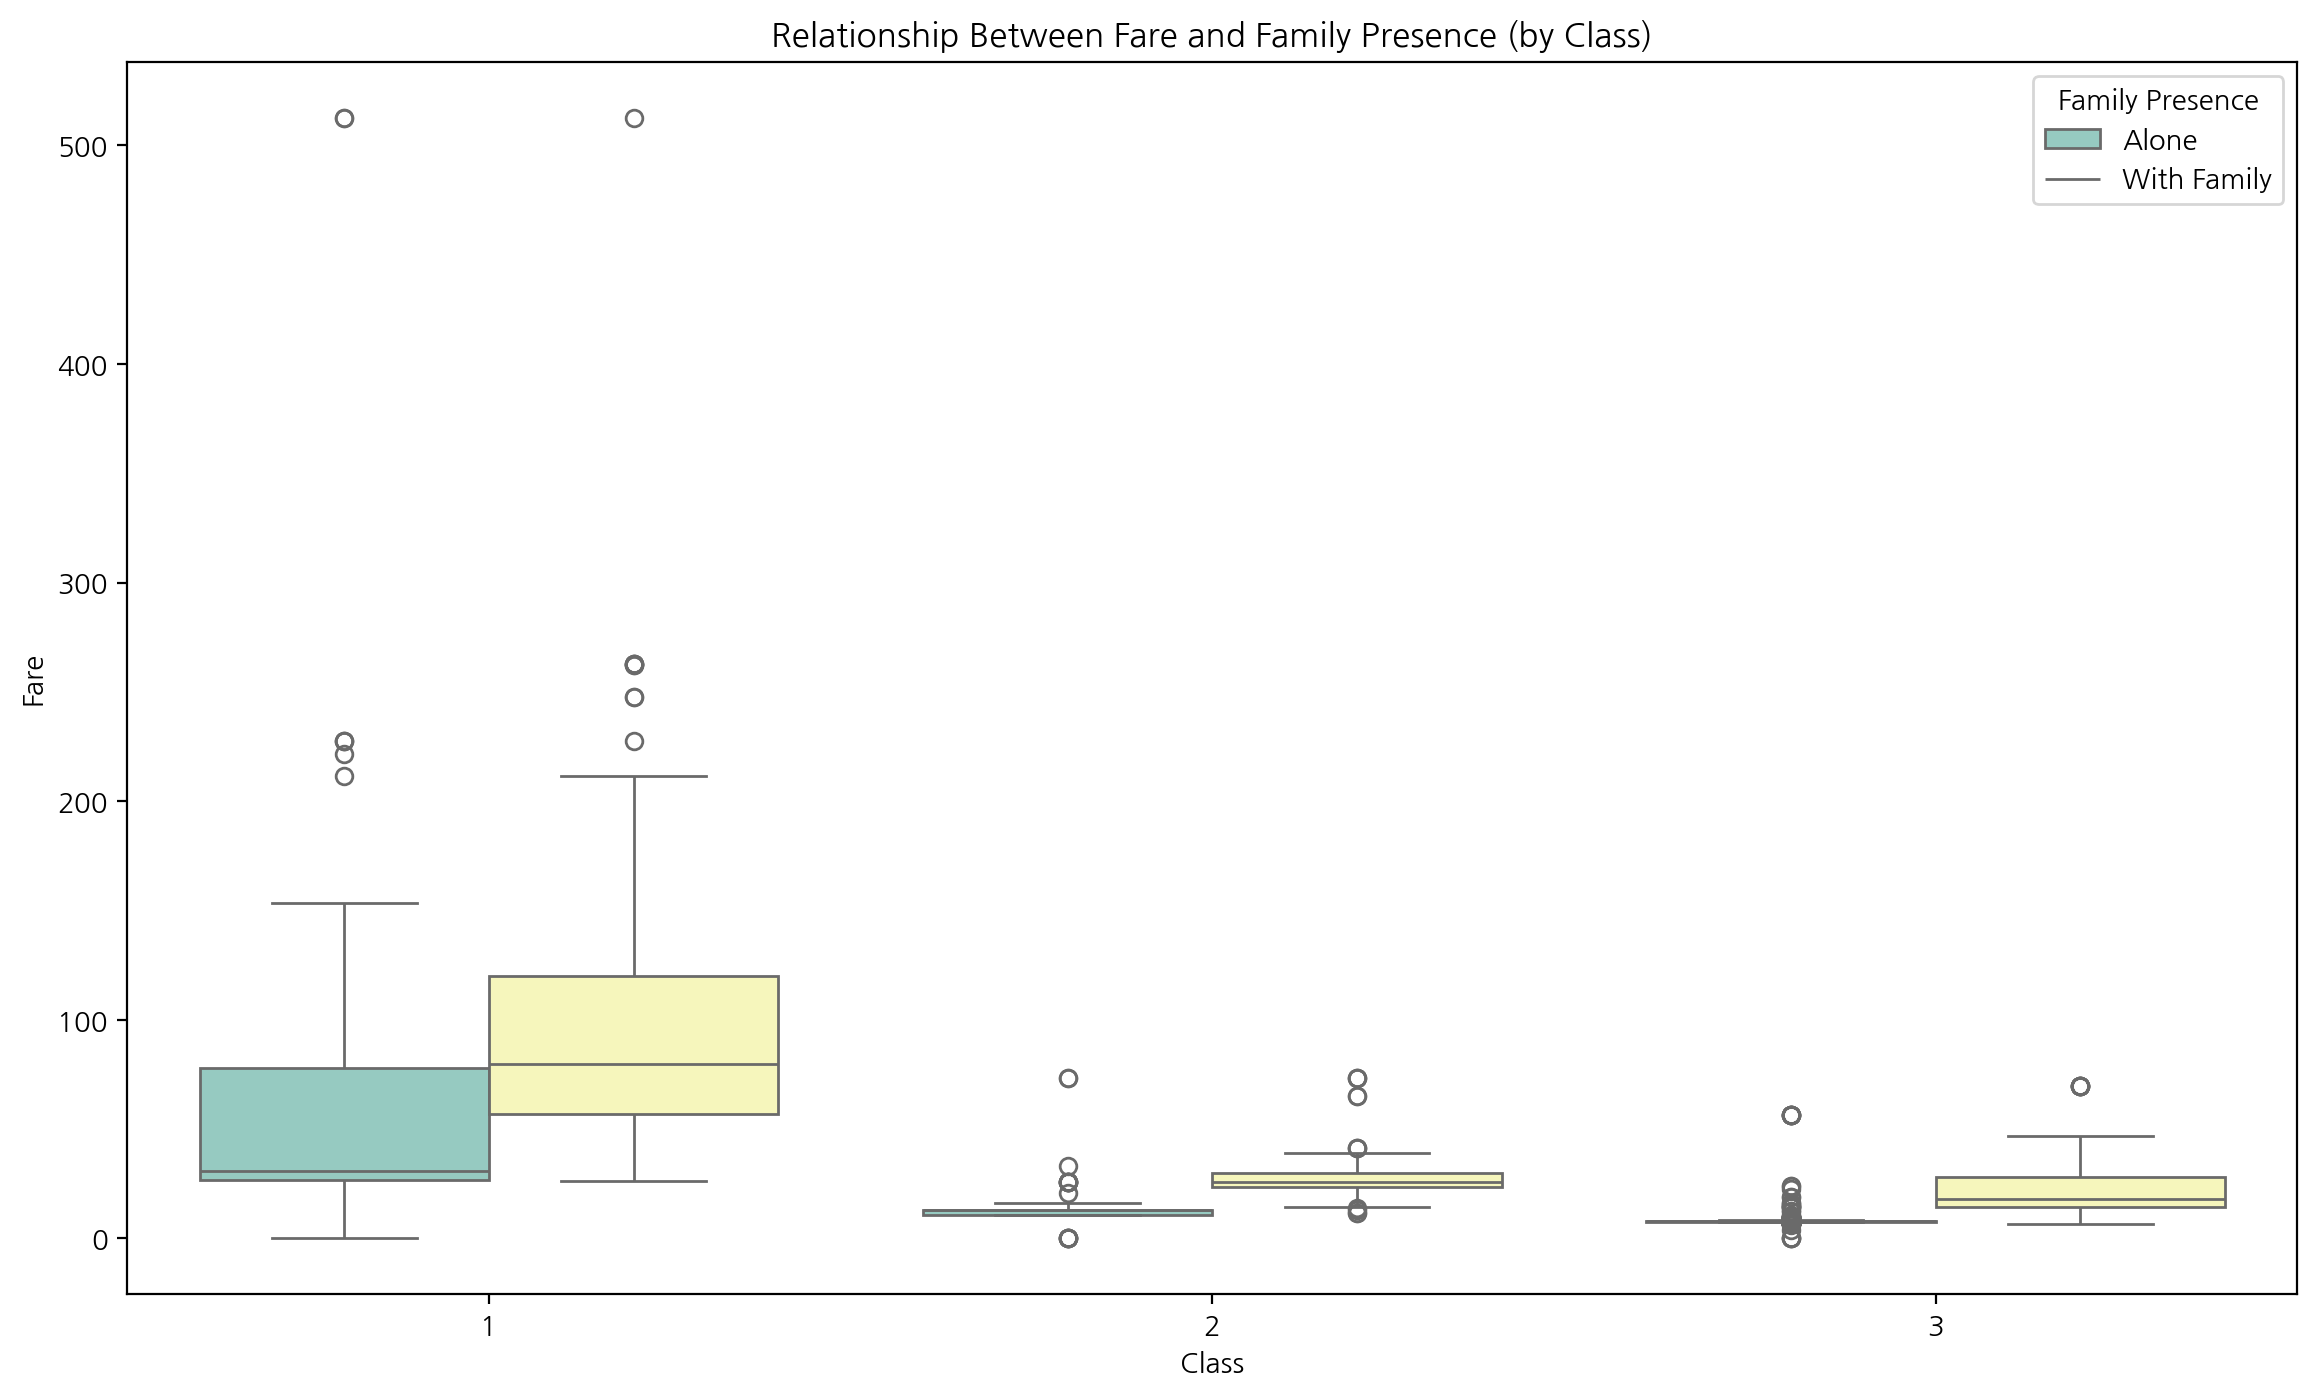

In [60]:
# 요금을 High와 Low로 구분 (중간값 기준)
df['fare_category'] = np.where(df['fare'] > df['fare'].median(), 'High', 'Low')

# 교차표 생성
cross_tab = pd.crosstab(df['fare_category'], df['family'])
crosstab_styled = cross_tab.style.background_gradient(cmap='summer_r')
# 교차표 출력
print("교차표:")
display(crosstab_styled)

# 카이제곱 검정 수행
chi2, p, dof, ex = chi2_contingency(cross_tab)

print(f"\n카이제곱 통계량: {chi2}")
print(f"p-value: {p}")
print(f"자유도: {dof}")
print("기대 빈도:")
print(ex)

# 시각화
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='pclass', y='fare', hue='family', palette='Set3')
plt.title('Relationship Between Fare and Family Presence (by Class)')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.legend(title='Family Presence', labels=['Alone', 'With Family'])
plt.show()

In [ ]:
#요금이 높은 경우 (High), 가족이 없는 사람은 140명이고, 가족이 있는 사람은 304명입니다.
#요금이 낮은 경우 (Low), 가족이 없는 사람은 397명이고, 가족이 있는 사람은 50명입니다.

#p-value는 7.88e-68로, 매우 작은 값이다 즉 요금과 가족동반여부는 독립적이지 않다


In [ ]:
#가족동반승객이면 돈을 더 많이 지불 = 가족이 있으면 더 비싼 티켓을 구매하는 경향이 보인다. 즉 1등급 3등급에 영향을 끼침

정리-히트맵

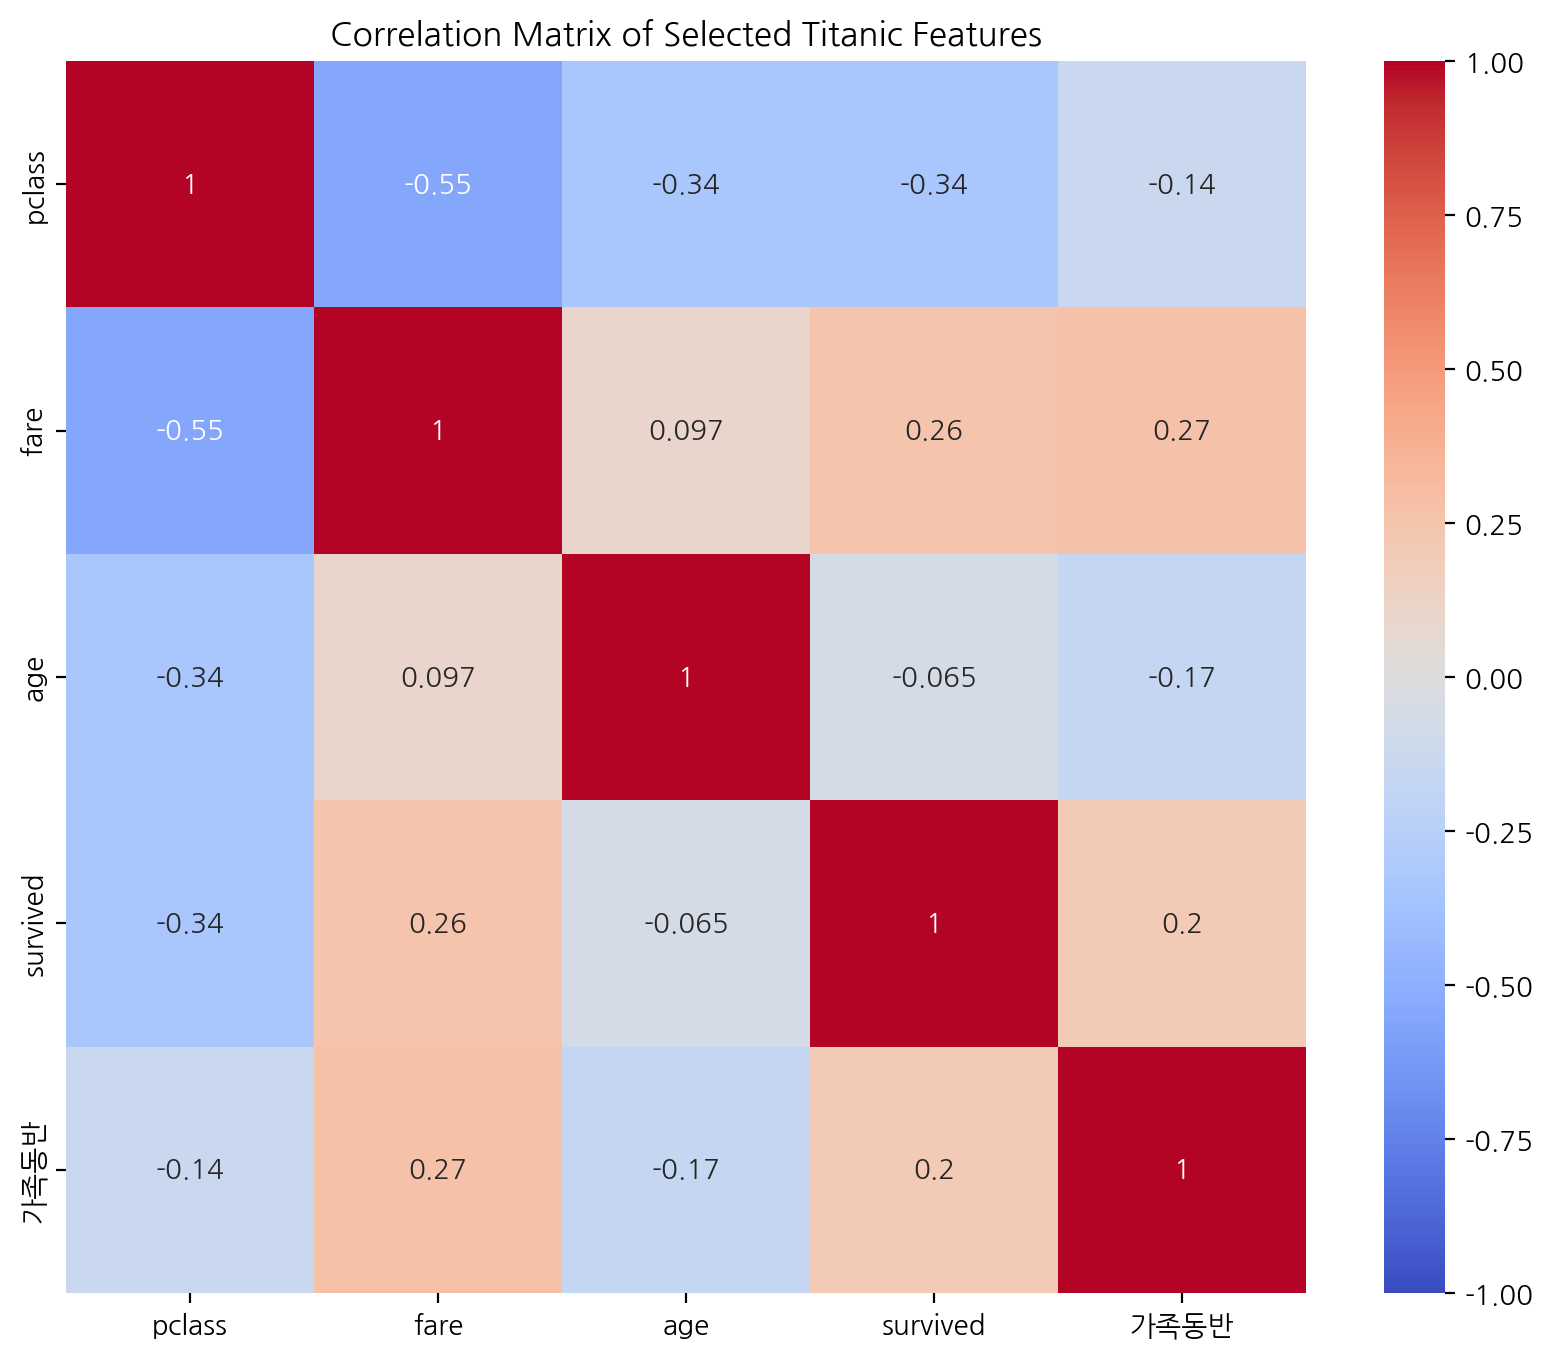

In [61]:
# 관심있는 변수들만 선택
df_selected = df[['pclass', 'fare', 'age', 'survived', '가족동반']]

# 결측값 처리 (age 컬럼의 결측값을 나이의 중위수로 채움)
df_selected['age'].fillna(df_selected['age'].median(), inplace=True)

# 상관계수 행렬 계산
correlation_matrix = df_selected.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Titanic Features')
plt.show()

In [ ]:
#등급과 생존율: 등급이 낮을수록 생존율이 낮아짐
#요금과 생존율: 요금이 높을수록 생존율이 높아지는 경향--> 1등급 승객일수록 생존율이 높음
#가족 동반 여부와 생존율: 가족과 함께 탑승한 경우 생존율이 약간 더 높은 경향이 있다. 이는 가족이 있는 승객들이 서로 돕거나 구조 우선순위에서 유리할 수 있음을 시사
#요금과 가족 동반 여부: 요금이 비쌀수록 가족과 함께 탑승하는 경우 다수,높은 등급(비싼 티켓)을 구매한 승객들이 가족 단위로 여행하는 경향이 있음

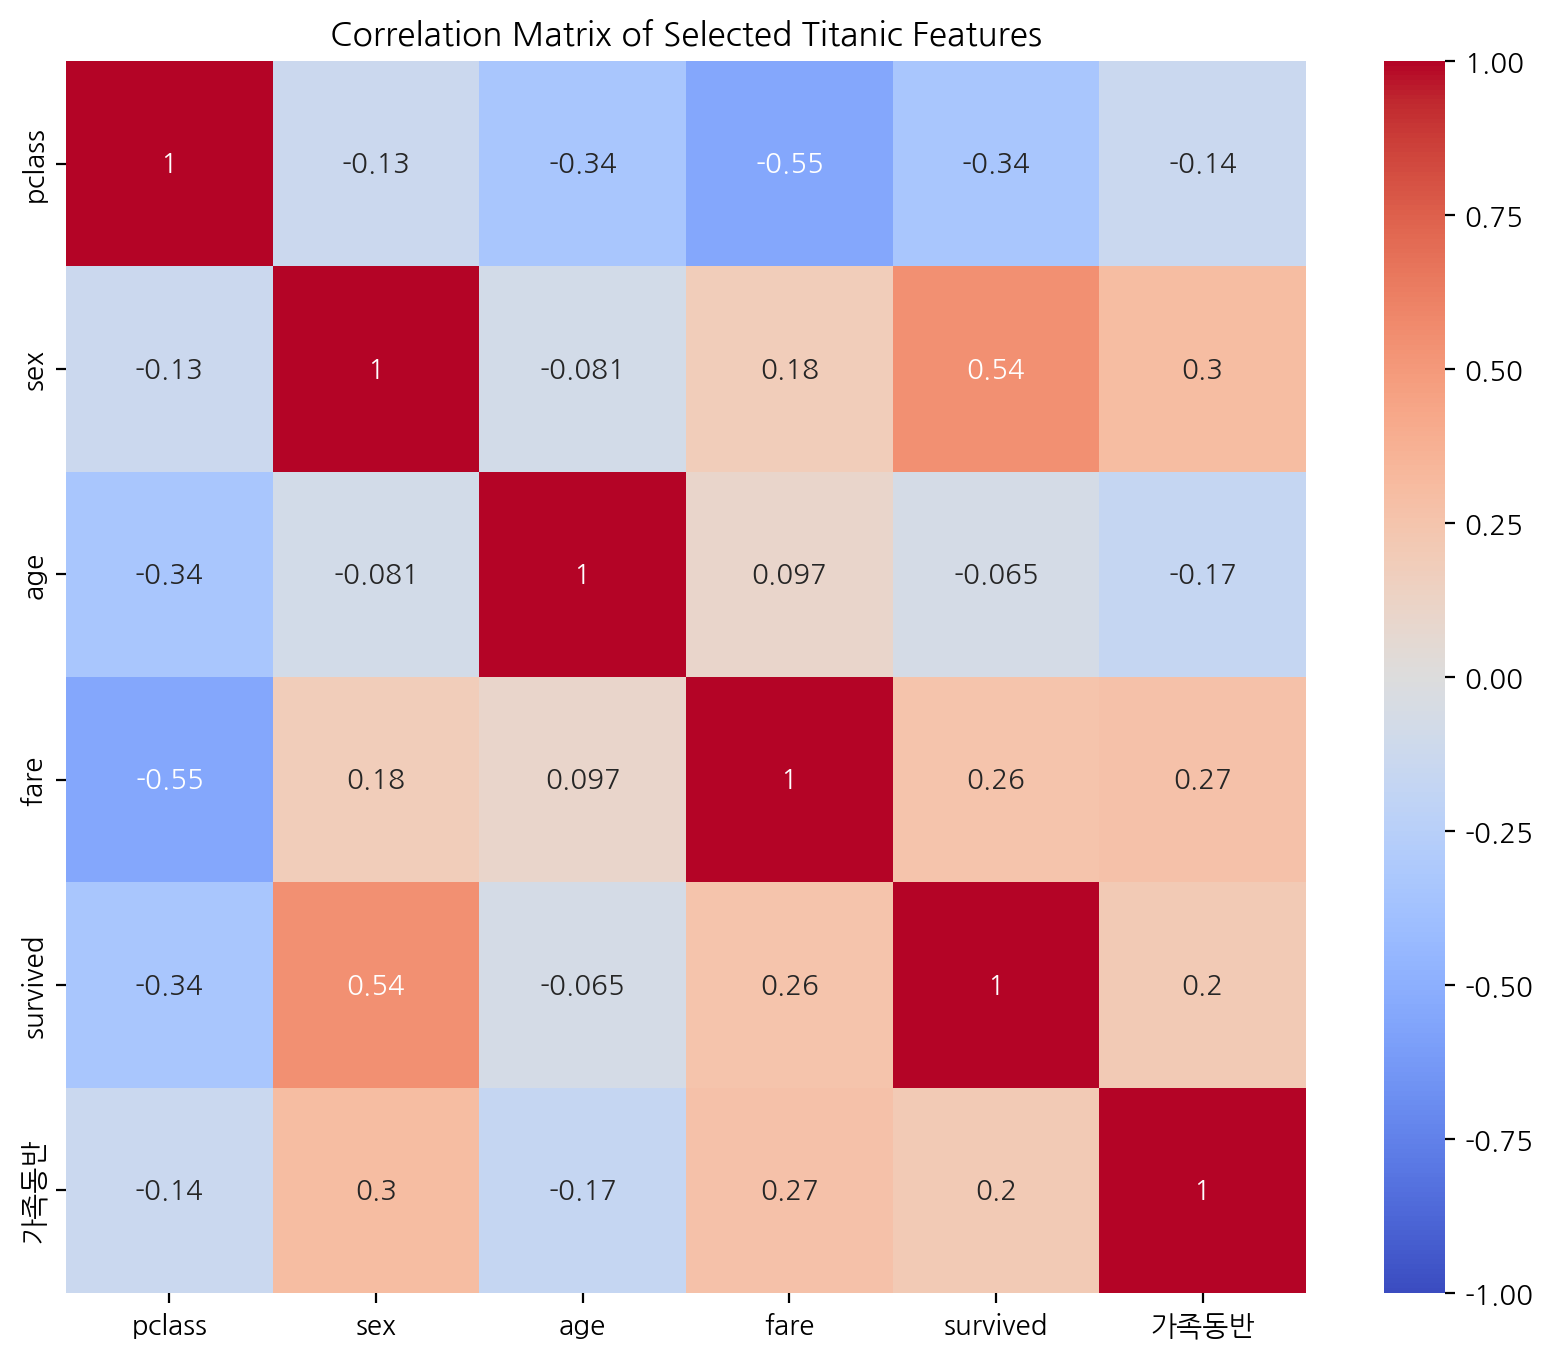

In [78]:
# 결측값 처리 (age와 fare 컬럼의 결측값을 각각의 중위수로 채움)
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# 가족 동반 여부 열 추가 및 이를 이진 변수로 변환
df = df.assign(
    가족동반=lambda x: x['sibsp'] + x['parch']
).assign(
    가족동반=lambda x: np.where(x['가족동반'] > 0, 1, 0)
)


df_selected1 = df[['pclass', 'sex', 'age', 'fare', 'survived', '가족동반']]

# 'sex' 변수를 숫자로 변환
df_selected1['sex'] = df_selected1['sex'].map({'male': 0, 'female': 1})

# 상관계수 행렬 계산
correlation_matrix = df_selected1.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Titanic Features')
plt.show()